# **This is Frank Javar's Final Capstone project.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
#This code is run/monitor additonal computing resources to run the model
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


**There are four Data sets, each contains an attack track. These data sets are combined in this part**

In [4]:
df_Tuesday = pd.read_csv('/content/drive/MyDrive/DataSet/Tuesday-WorkingHours.pcap_ISCX.csv')

In [5]:
# To reduce the dataset, select rows between index 15000 and 25000
df_subset_tuesday = df_Tuesday.loc[15000:25000].copy()

# Define the path for the new CSV file
output_path = '/content/drive/MyDrive/DataSet/Tuesday.pcap_ISCX_15000_25000.csv'

# Save the subset to a new CSV file
df_subset_tuesday.to_csv(output_path, index=False)

print(f"New dataset saved to: {output_path}")

New dataset saved to: /content/drive/MyDrive/DataSet/Tuesday.pcap_ISCX_15000_25000.csv


In [6]:
# Get the number of rows in df_subset
num_rows = df_subset_tuesday.shape[0]

# Print the number of rows
print(f"Number of rows in df: {num_rows}")

Number of rows in df: 10001


In [7]:
df_Wednesday = pd.read_csv('/content/drive/MyDrive/DataSet/Wednesday-workingHours.pcap_ISCX.csv')

In [8]:
# To reduce the dataset, select rows between index 15000 and 25000
df_subset_wednesday = df_Wednesday.loc[39000:49000].copy()

# Define the path for the new CSV file
output_path = '/content/drive/MyDrive/DataSet/Wednesday.pcap_ISCX_39000_49000.csv'

# Save the subset to a new CSV file
df_subset_wednesday.to_csv(output_path, index=False)

print(f"New dataset saved to: {output_path}")

New dataset saved to: /content/drive/MyDrive/DataSet/Wednesday.pcap_ISCX_39000_49000.csv


In [9]:
# Get the number of rows in df_subset
num_rows = df_subset_wednesday.shape[0]

# Print the number of rows
print(f"Number of rows in df: {num_rows}")

Number of rows in df: 10001


In [10]:
df_Thursday_Morning = pd.read_csv('/content/drive/MyDrive/DataSet/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

In [11]:
# To reduce the dataset, select rows between index 15000 and 25000
df_subset_thursday = df_Thursday_Morning.loc[19000:29000].copy()

# Define the path for the new CSV file
output_path = '/content/drive/MyDrive/DataSet/Thursday_Morning.pcap_ISCX_19000_29000.csv'

# Save the subset to a new CSV file
df_subset_thursday.to_csv(output_path, index=False)

print(f"New dataset saved to: {output_path}")

New dataset saved to: /content/drive/MyDrive/DataSet/Thursday_Morning.pcap_ISCX_19000_29000.csv


In [12]:
# Get the number of rows in df_subset
num_rows = df_subset_thursday.shape[0]

# Print the number of rows
print(f"Number of rows in df: {num_rows}")

Number of rows in df: 10001


In [13]:
df_Friday_Afternoon = pd.read_csv('/content/drive/MyDrive/DataSet/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [14]:
# To reduce the dataset, select rows between index 18500 and 28500
df_subset_friday_Afternoon = df_Friday_Afternoon.loc[18500:28500].copy()

# Define the path for the new CSV file
output_path = '/content/drive/MyDrive/DataSet/Friday-Afternoon-DDos.pcap_ISCX_18500-28500.csv'

# Save the subset to a new CSV file
df_subset_friday_Afternoon.to_csv(output_path, index=False)

print(f"New dataset saved to: {output_path}")

New dataset saved to: /content/drive/MyDrive/DataSet/Friday-Afternoon-DDos.pcap_ISCX_18500-28500.csv


In [15]:
# Get the number of rows in df_subset
num_rows = df_subset_friday_Afternoon.shape[0]

# Print the number of rows
print(f"Number of rows in df: {num_rows}")

Number of rows in df: 10001


In [16]:
#Combine all four data set into one data set
combined_df = pd.concat([df_subset_tuesday, df_subset_wednesday, df_subset_thursday, df_subset_friday_Afternoon], ignore_index=True)
print("Combined DataFrame created successfully.")
display(combined_df.head())
display(combined_df.info())

Combined DataFrame created successfully.


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49601,1,2,0,0,0,0,0,0.000000,0.000000,...,20,0.00,0.00000,0,0,0.0,0.00000,0,0,BENIGN
1,443,5839144,8,5,348,161,220,0,43.500000,77.178828,...,20,109754.00,0.00000,109754,109754,5729372.0,0.00000,5729372,5729372,BENIGN
2,38942,3,2,0,0,0,0,0,0.000000,0.000000,...,20,0.00,0.00000,0,0,0.0,0.00000,0,0,BENIGN
3,443,7299690,11,9,839,3433,501,0,76.272727,151.252829,...,32,518108.00,0.00000,518108,518108,6781581.0,0.00000,6781581,6781581,BENIGN
4,80,50913156,8,8,419,1766,419,0,52.375000,148.138871,...,32,61376.25,44631.71087,128323,38862,10200000.0,76970.05944,10200000,10000000,BENIGN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40004 entries, 0 to 40003
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             40004 non-null  int64  
 1    Flow Duration                40004 non-null  int64  
 2    Total Fwd Packets            40004 non-null  int64  
 3    Total Backward Packets       40004 non-null  int64  
 4   Total Length of Fwd Packets   40004 non-null  int64  
 5    Total Length of Bwd Packets  40004 non-null  int64  
 6    Fwd Packet Length Max        40004 non-null  int64  
 7    Fwd Packet Length Min        40004 non-null  int64  
 8    Fwd Packet Length Mean       40004 non-null  float64
 9    Fwd Packet Length Std        40004 non-null  float64
 10  Bwd Packet Length Max         40004 non-null  int64  
 11   Bwd Packet Length Min        40004 non-null  int64  
 12   Bwd Packet Length Mean       40004 non-null  float64
 13   

None

In [17]:
# Get the number of rows in df_subset
num_rows = combined_df.shape[0]

# Print the number of rows
print(f"Number of rows in df: {num_rows}")

Number of rows in df: 40004


In [18]:
# Check for duplicate rows
duplicate_rows = combined_df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")
combined_df.drop_duplicates(inplace=True)

Number of duplicate rows: 680


In [19]:
# Eliminate duplicate rows
combined_df.drop_duplicates(inplace=True)

In [20]:
# Get the number of rows in df
num_rows = combined_df.shape[0]

# Print the number of rows
print(f"Number of rows in df: {num_rows}")

Number of rows in df: 39324


In [21]:
# Check for empty strings in object type columns
for col in combined_df.select_dtypes(include='object').columns:
    print(f"\nEmpty strings in column '{col}':")
    print((combined_df[col] == '').sum())

# Total count of missing values
print(f"\nTotal missing values in the DataFrame: {combined_df.isnull().sum().sum()}")


Empty strings in column ' Label':
0

Total missing values in the DataFrame: 5


In [22]:
#Eliminate any remaining strings from the dataframe
#Get the initial number of rows
initial_rows = combined_df.shape[0]

# Replace infinite values with NaN
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (which now include the original infinite values)
combined_df.dropna(inplace=True)

# Get the number of rows after dropping
rows_after_dropping = combined_df.shape[0]

# Calculate the number of eliminated rows
eliminated_rows = initial_rows - rows_after_dropping

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after eliminating 'Infinity' and NaN values: {rows_after_dropping}")
print(f"Number of rows eliminated: {eliminated_rows}")

Initial number of rows: 39324
Number of rows after eliminating 'Infinity' and NaN values: 39298
Number of rows eliminated: 26


In [23]:
# Detect outliers in a specific column using IQR
# Replace 'Your_Column_Name' with the actual column name you want to check
columns_to_check = ['Fwd Header Length', 'Bwd Header Length']  # Example column

# Strip whitespace from column names
combined_df.columns = combined_df.columns.str.strip()

Q1 = combined_df[columns_to_check].quantile(0.25)
Q3 = combined_df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = combined_df[(combined_df[columns_to_check] < lower_bound) | (combined_df[columns_to_check] > upper_bound)]


print(f"Number of outliers in '{columns_to_check}': {len(outliers)}")
#print("Outliers:")
#display(outliers)
display(combined_df.head())

Number of outliers in '['Fwd Header Length', 'Bwd Header Length']': 39298


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49601,1,2,0,0,0,0,0,0.000000,0.000000,...,20,0.00,0.00000,0,0,0.0,0.00000,0,0,BENIGN
1,443,5839144,8,5,348,161,220,0,43.500000,77.178828,...,20,109754.00,0.00000,109754,109754,5729372.0,0.00000,5729372,5729372,BENIGN
2,38942,3,2,0,0,0,0,0,0.000000,0.000000,...,20,0.00,0.00000,0,0,0.0,0.00000,0,0,BENIGN
3,443,7299690,11,9,839,3433,501,0,76.272727,151.252829,...,32,518108.00,0.00000,518108,518108,6781581.0,0.00000,6781581,6781581,BENIGN
4,80,50913156,8,8,419,1766,419,0,52.375000,148.138871,...,32,61376.25,44631.71087,128323,38862,10200000.0,76970.05944,10200000,10000000,BENIGN


**IQR WAS NOT AN EFFECTIVE METHOD TO DETECT OULIERS. SO, ALTERNATIVELY LOOKING AT THE DATA DISTRIBUTION.**

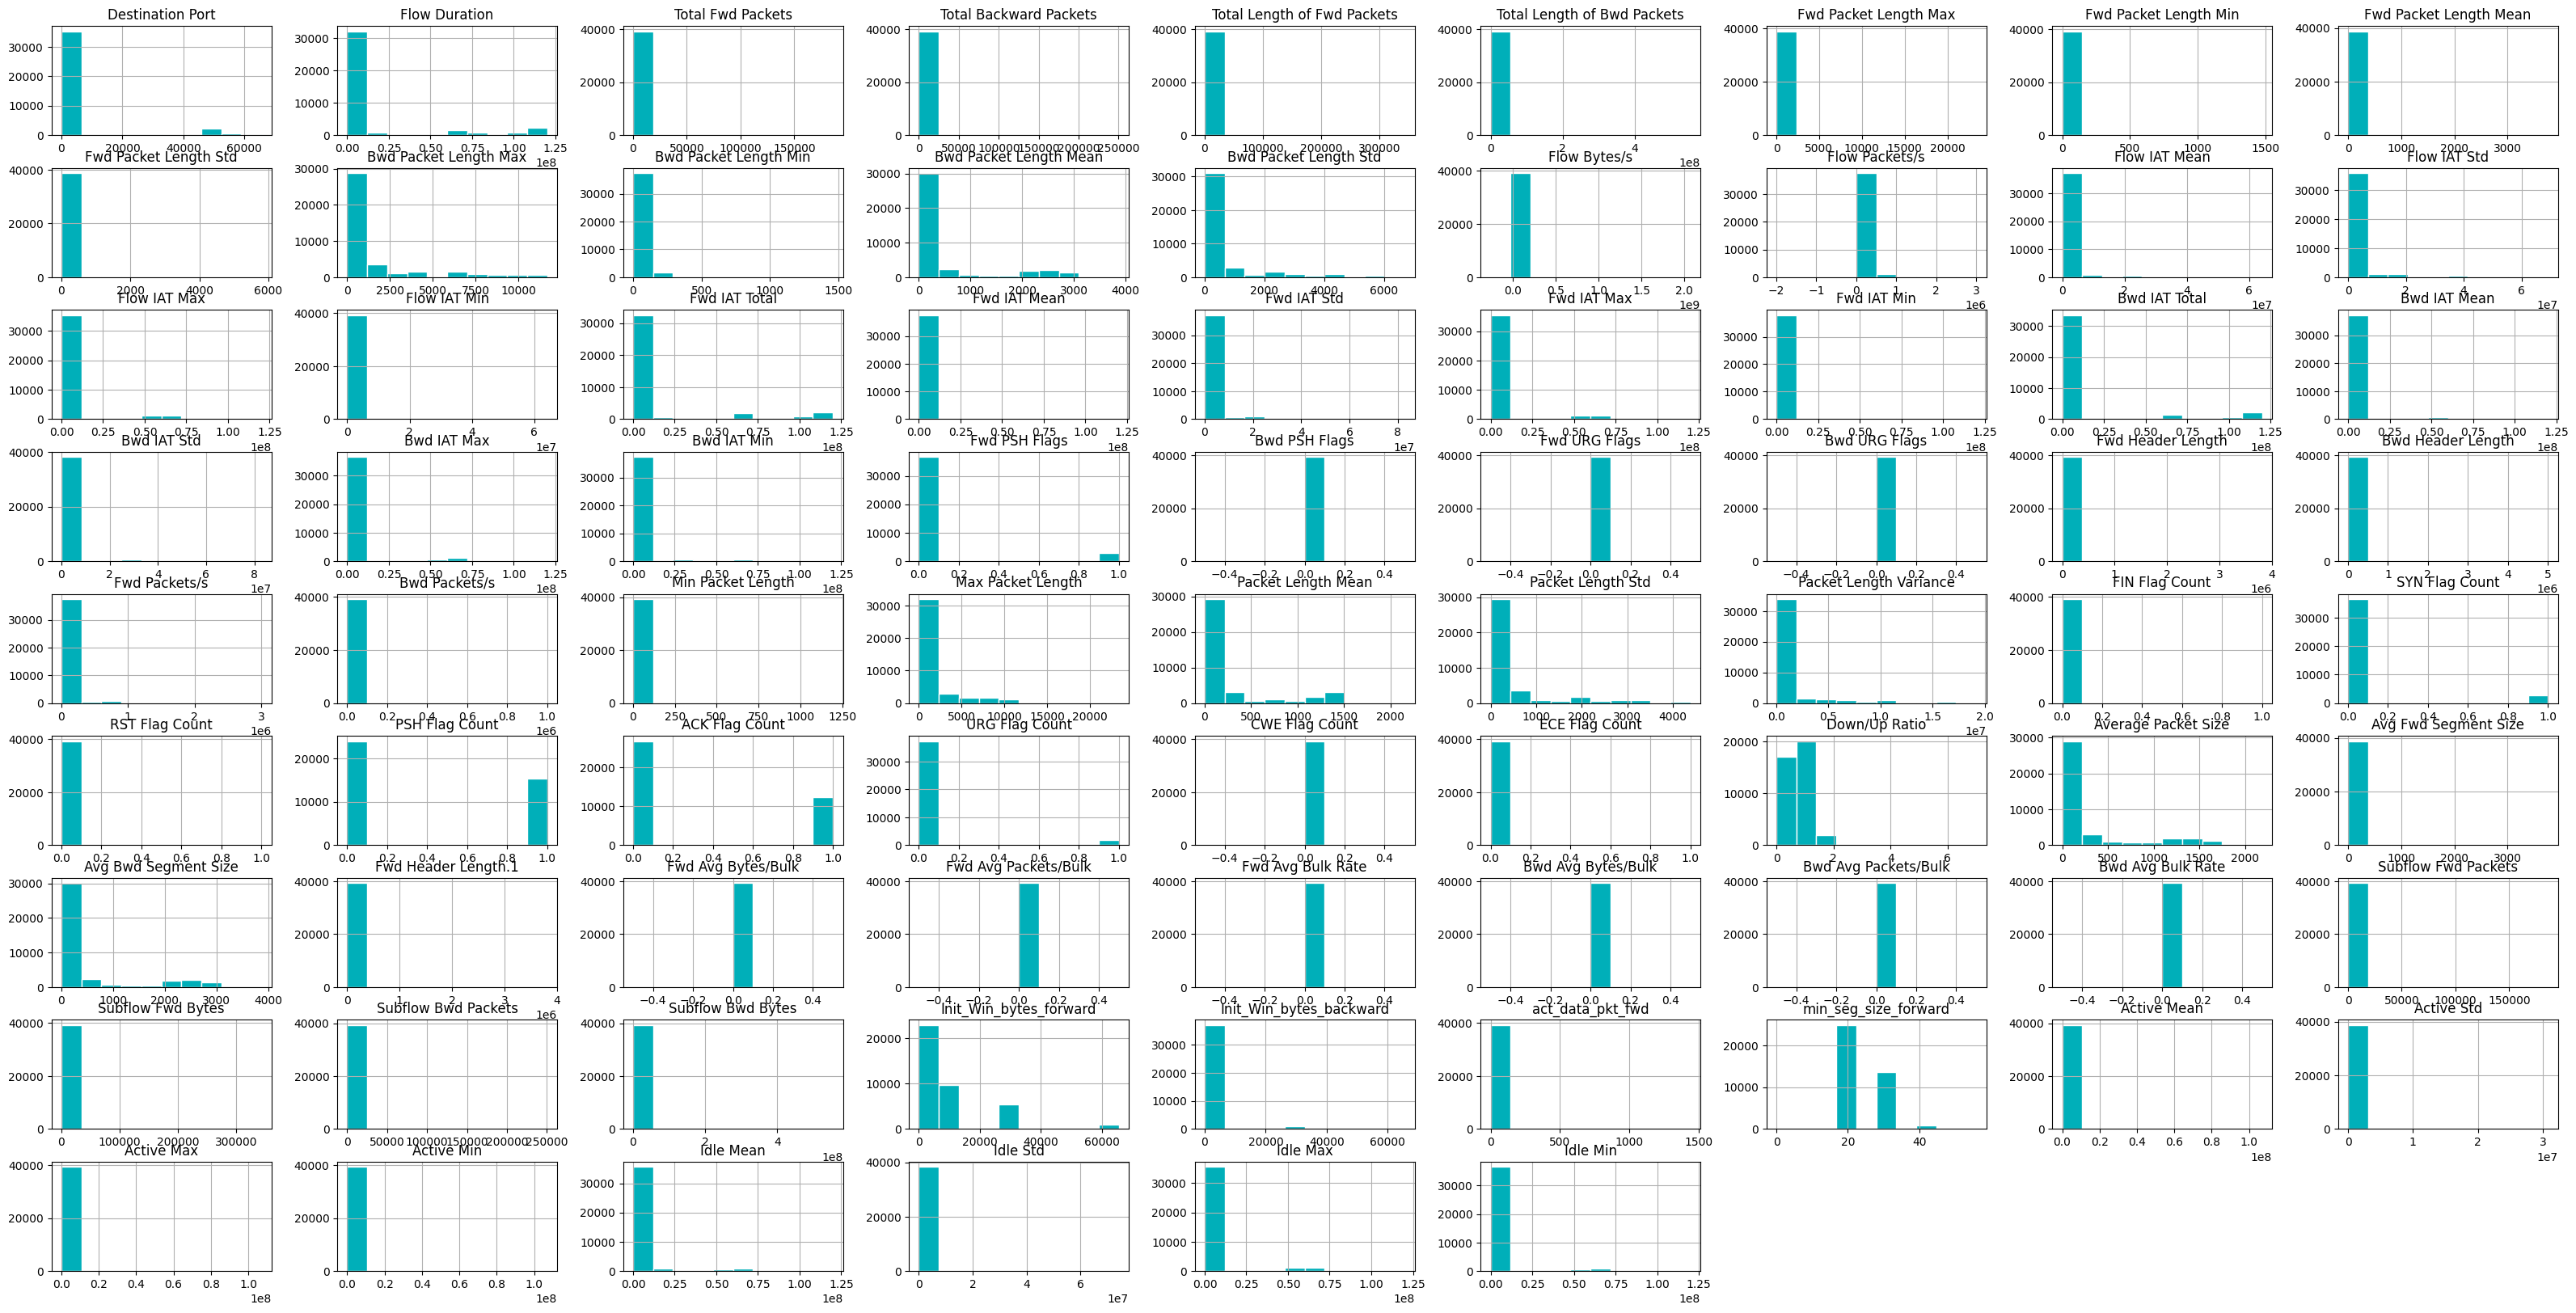

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,39298.000000,3.929800e+04,39298.000000,39298.000000,39298.000000,3.929800e+04,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,39298.000000,39298.0,39298.0,39298.0,3.929800e+04,3.929800e+04,3.929800e+04,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,3.929800e+04,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.0,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,3.929800e+04,39298.0,39298.0,39298.0,39298.0,39298.0,39298.0,39298.000000,39298.000000,39298.000000,3.929800e+04,39298.000000,39298.000000,39298.000000,39298.000000,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04,3.929800e+04
mean,5061.205379,1.555700e+07,42.030612,54.655377,591.280294,1.115246e+05,182.532775,15.651407,51.759637,60.637402,1334.447173,31.693928,445.994347,561.615281,2.937989e+06,4.836786e+04,1.743314e+06,3.265564e+06,8.013193e+06,7.766975e+04,1.505371e+07,3.855597e+06,2.045757e+06,7.763198e+06,2.657825e+06,1.274381e+07,3.989245e+06,1.217944e+06,5.848942e+06,3.104532e+06,0.069164,0.0,0.0,0.0,9.105883e+02,1.133604e+03,4.577739e+04,2692.254950,14.796122,1392.733371,256.266816,468.416469,1.039470e+06,0.003308,0.069164,0.000178,0.389613,0.316759,0.048578,0.0,0.000178,0.636190,288.726231,51.759637,445.994347,9.105883e+02,0.0,0.0,0.0,0.0,0.0,0.0,42.030612,591.280294,54.655377,1.114990e+05,7899.015726,2003.077790,3.694488,24.571530,1.410707e+05,1.106820e+05,2.783571e+05,7.034254e+04,6.456298e+06,7.935282e+05,7.229355e+06,5.854974e+06
std,14846.764161,3.305670e+07,2306.504494,3143.261531,4575.331296,6.873431e+06,575.106964,41.364072,135.982224,211.137672,2616.267510,60.019911,803.026662,1202.068594,3.621683e+07,2.316483e+05,5.244333e+06,9.059943e+06,1.948606e+07,1.553686e+06,3.300373e+07,1.451053e+07,5.547291e+06,1.954362e+07,1.436169e+07,3.158400e+07,1.550011e+07,4.649867e+06,1.805807e+07,1.484643e+07,0.253736,0.0,0.0,0.0,4.805180e+04,6.286722e+04,2.273404e+05,25750.911238,29.515593,2637.434712,424.304988,905.655723,2.854820e+06,0.057421,0.253736,0.013345,0.487669,0.465219,0.214986,0.0,0.013345,0.659997,472.525519,135.982224,803.026662,4.805180e+04,0.0,0.0,0.0,0.0,0.0,0.0,2306.504494,4575.331296,3143.261531,6.871513e+06,13247.221646,8310.904239,20.243659,6.162509,9.985755e+05,6.920862e+05,1.511211e+06,8.539075e+05,1.803488e+07,5.008732e+06,1.950445e+07,1.760696e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,

In [24]:
#Checking the distribution of the data to observe skewness
#Two key columns are "Fwd Header Length" and "Bwd Heather Length"
#The obrupt variation in these headers are indicative of changes (by hacker)

# Distribution
numbers = combined_df.select_dtypes(['int64', 'float64']).columns.to_list()

# Replace infinite values with NaN and drop rows with NaNs just for plotting
# This ensures the plotting function doesn't encounter infinite values
df_subset_cleaned = combined_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df_subset_cleaned.hist(figsize=(40,20), edgecolor='white', color='#00afb9')
plt.show()
pd.set_option('display.max_columns', None)
display(df_subset_cleaned[numbers].describe())

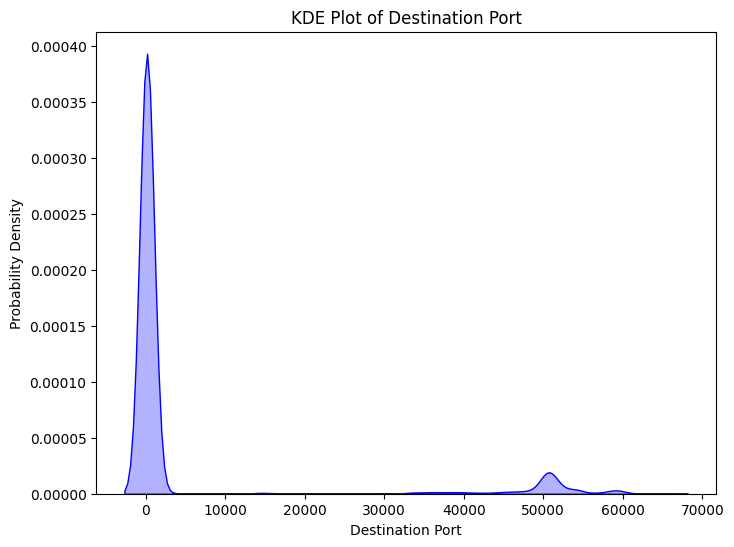

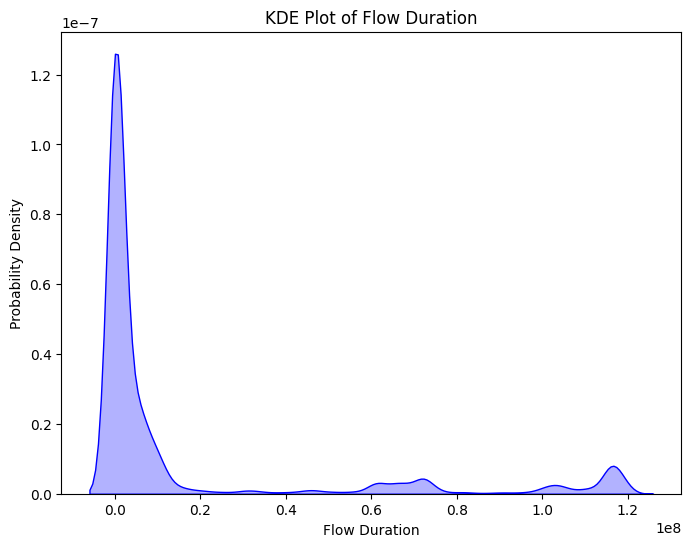

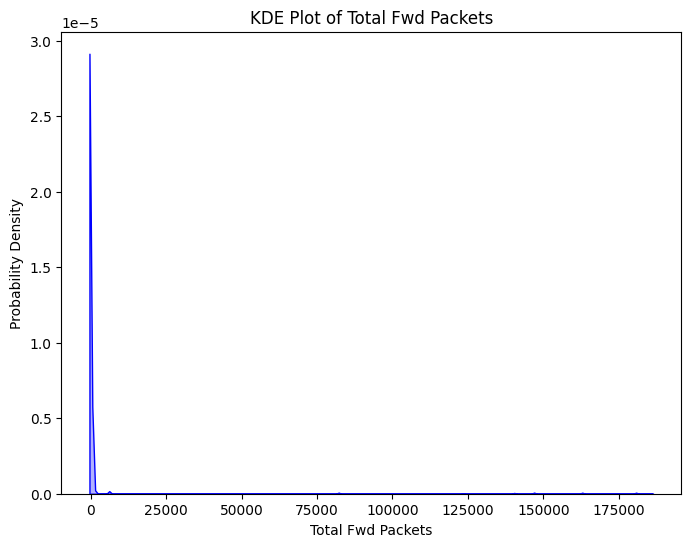

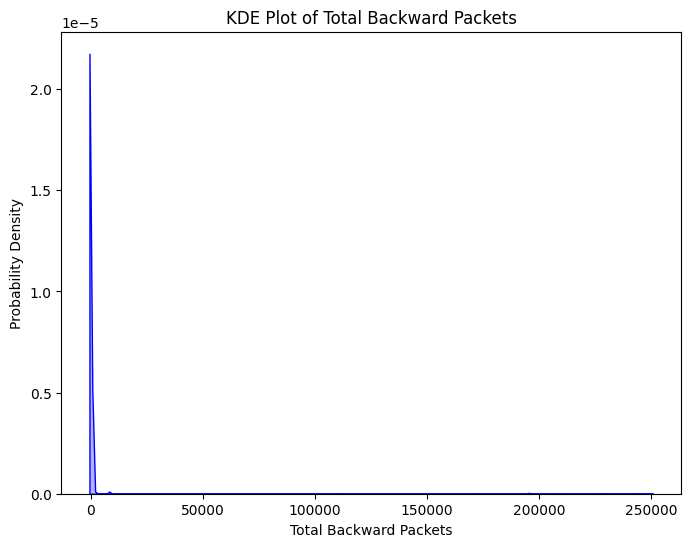

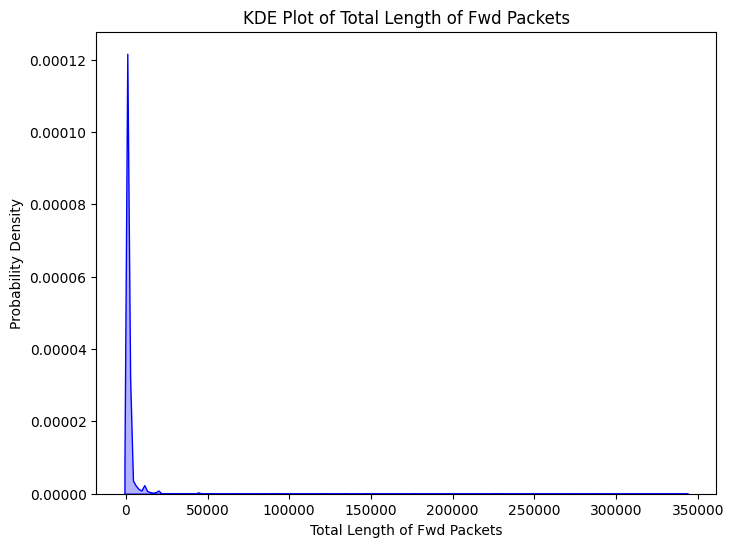

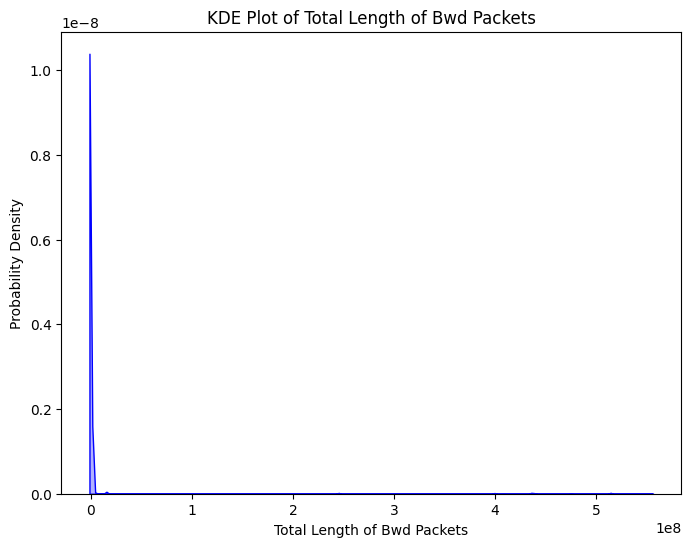

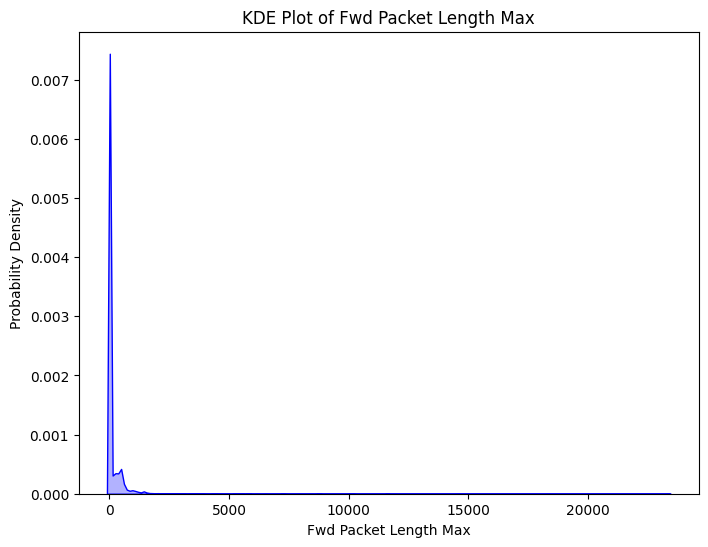

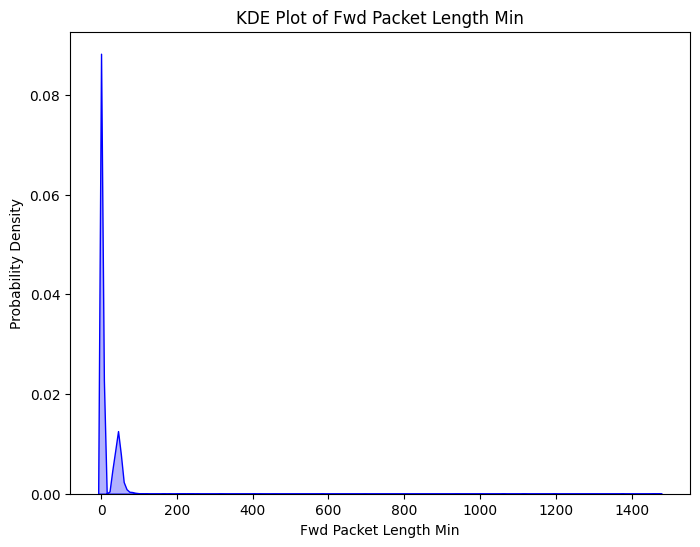

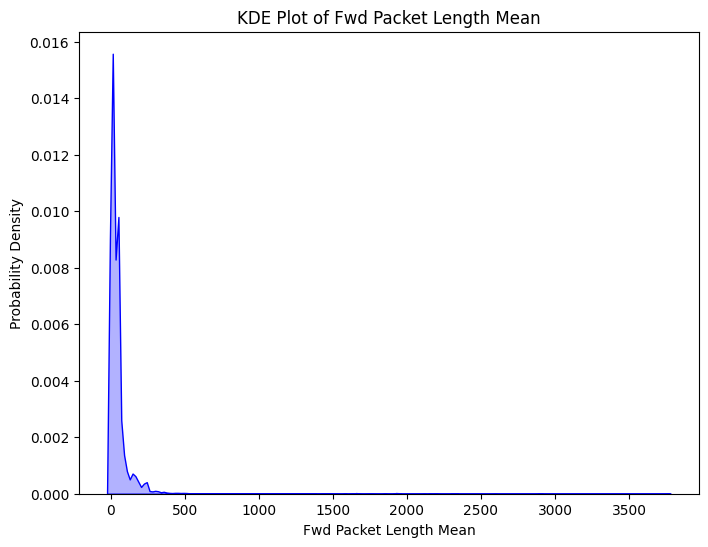

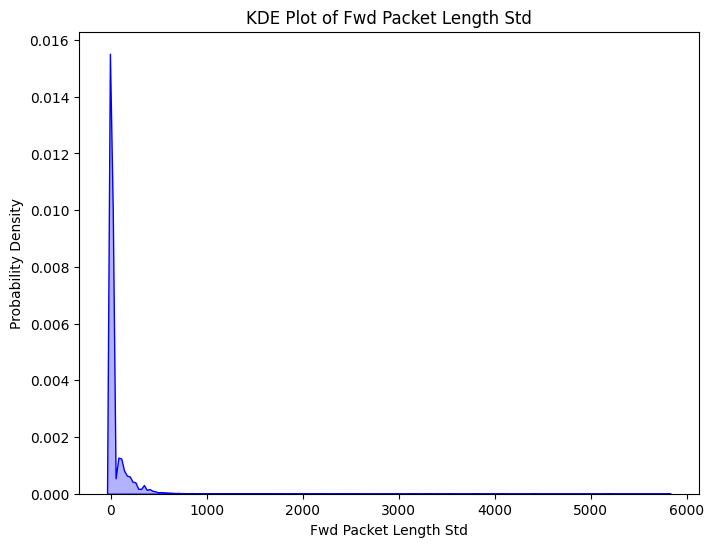

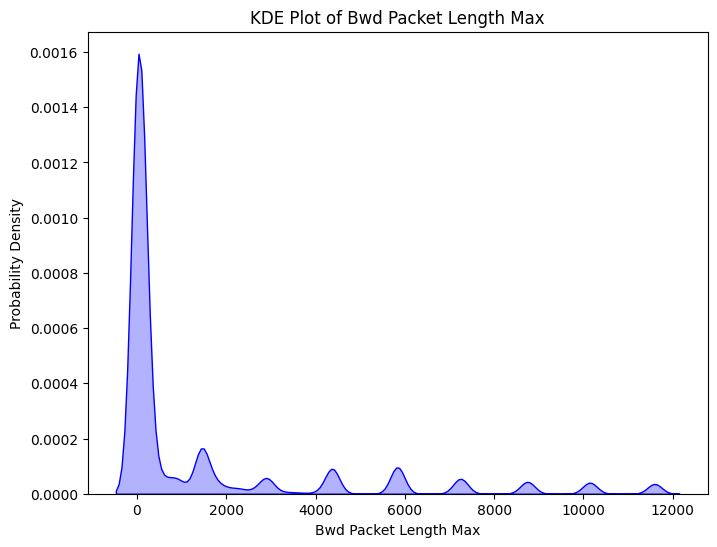

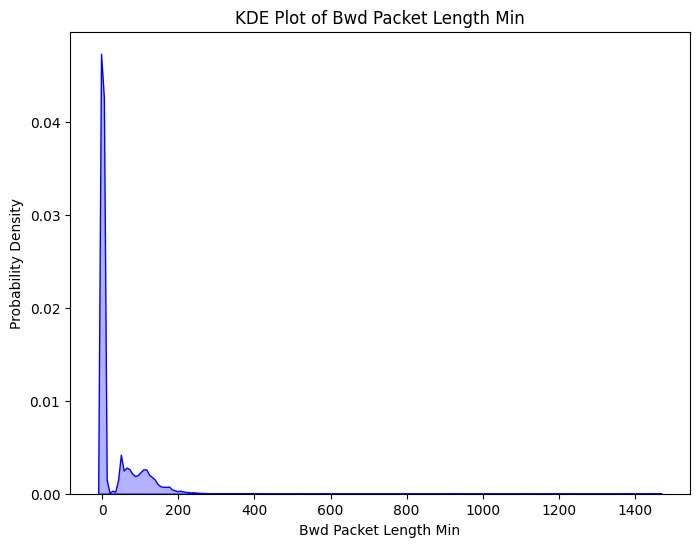

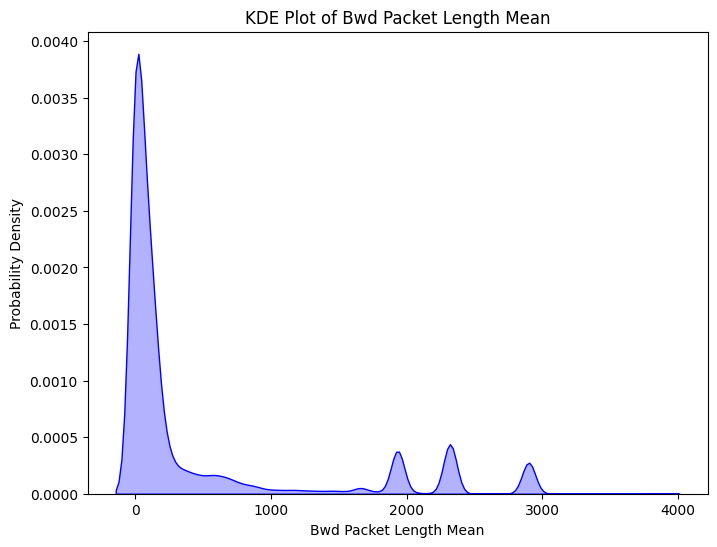

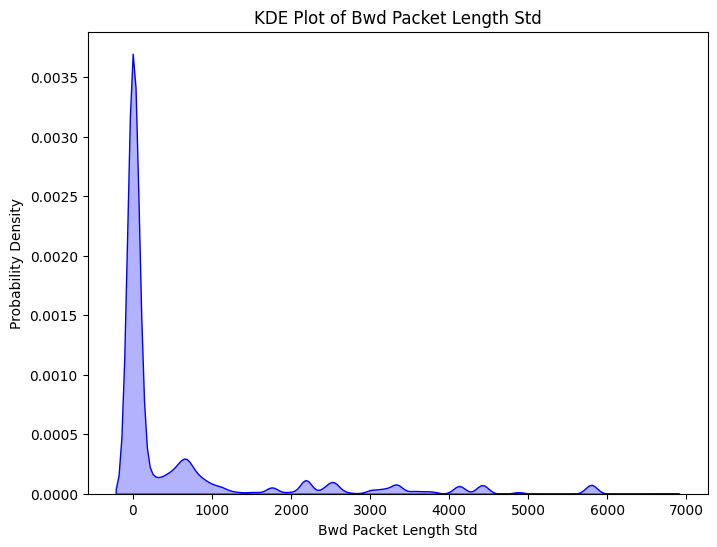

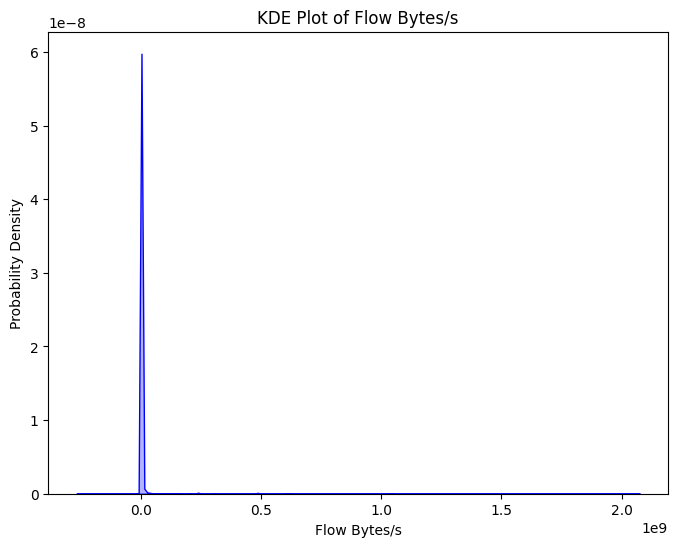

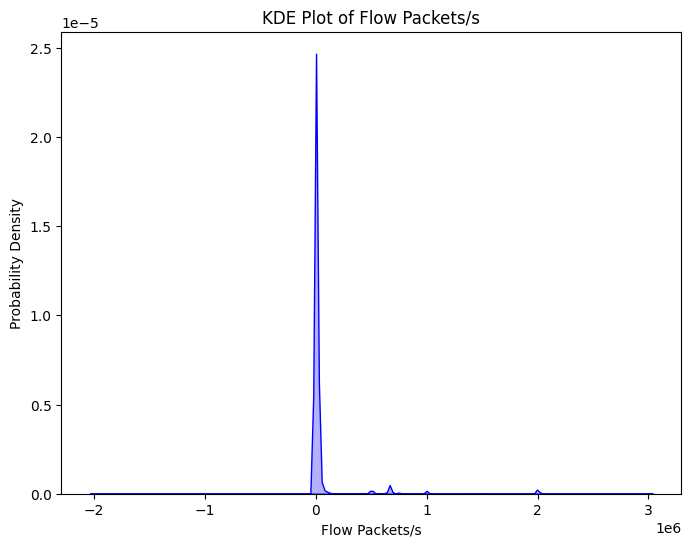

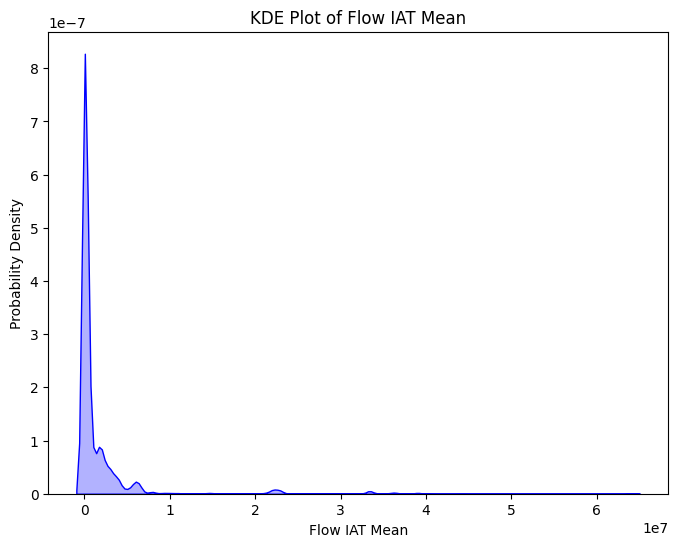

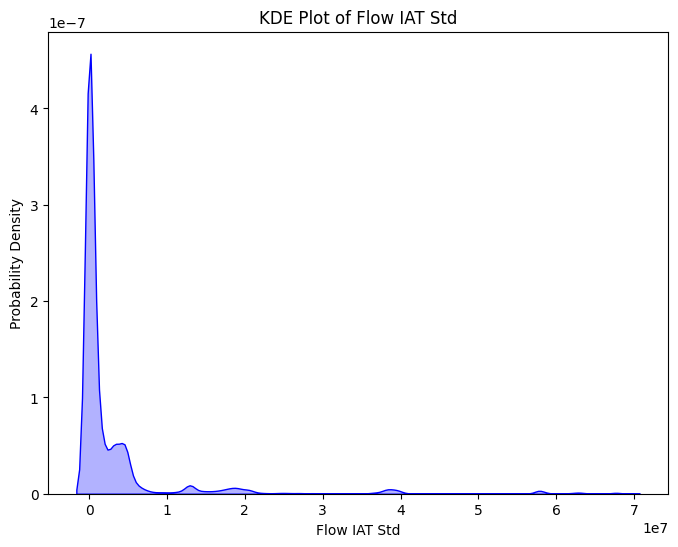

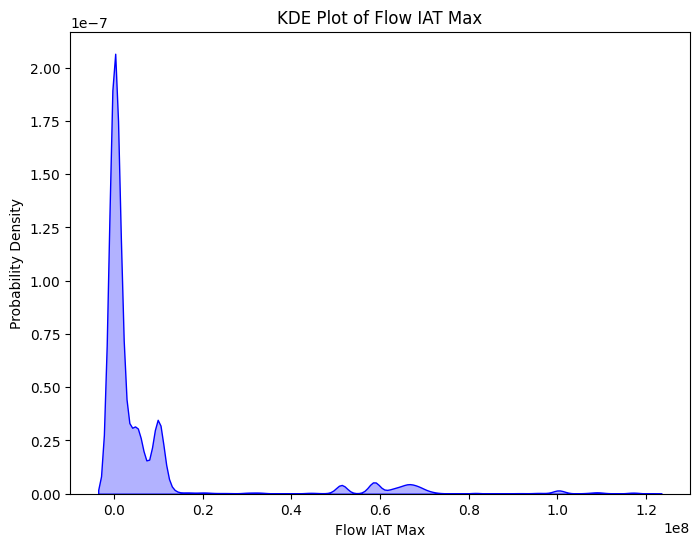

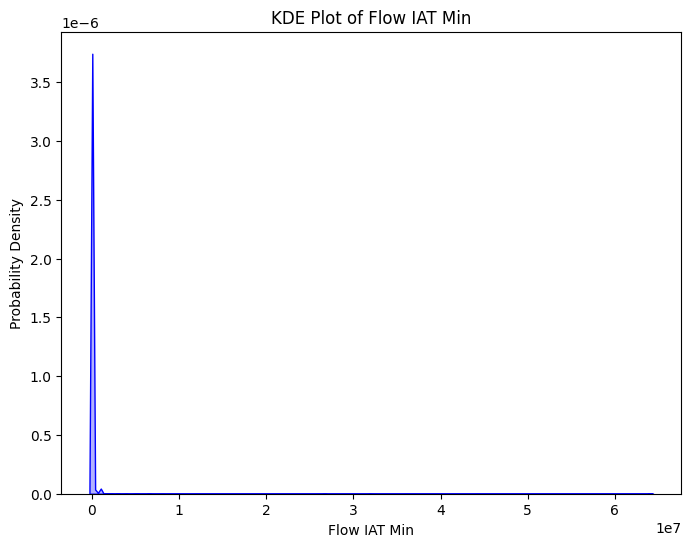

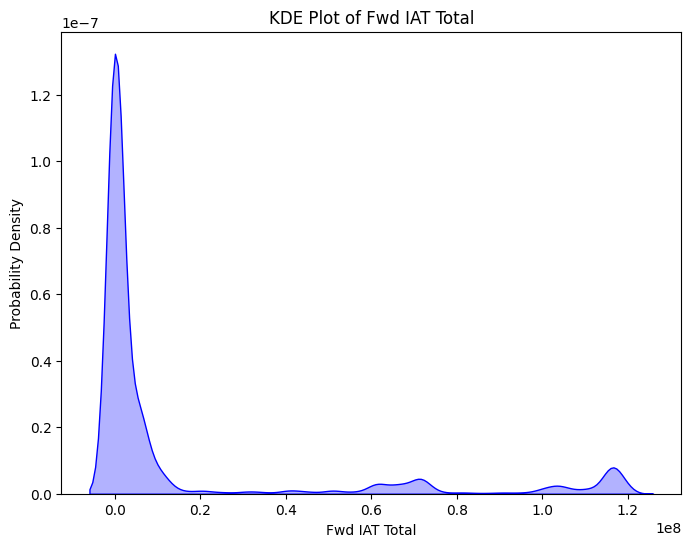

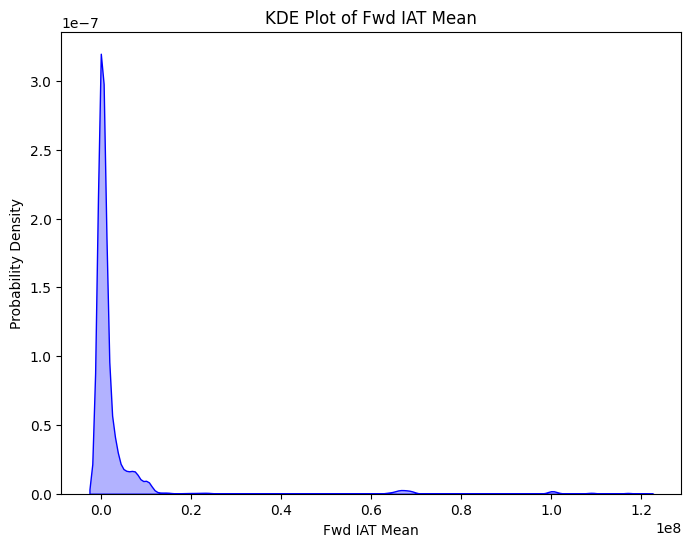

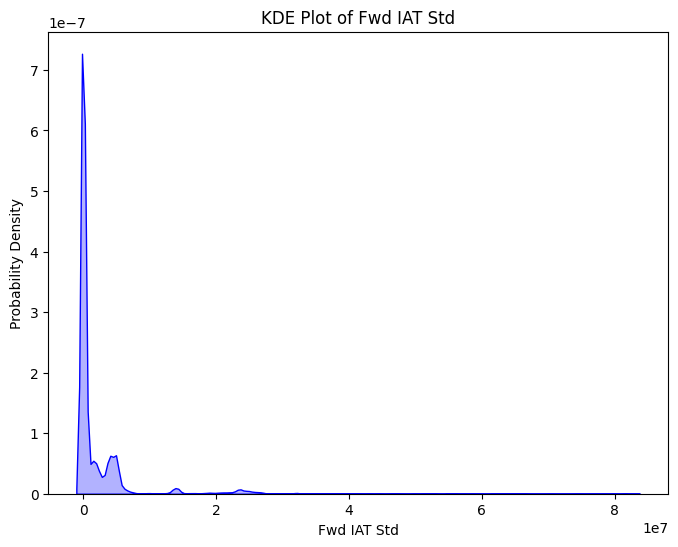

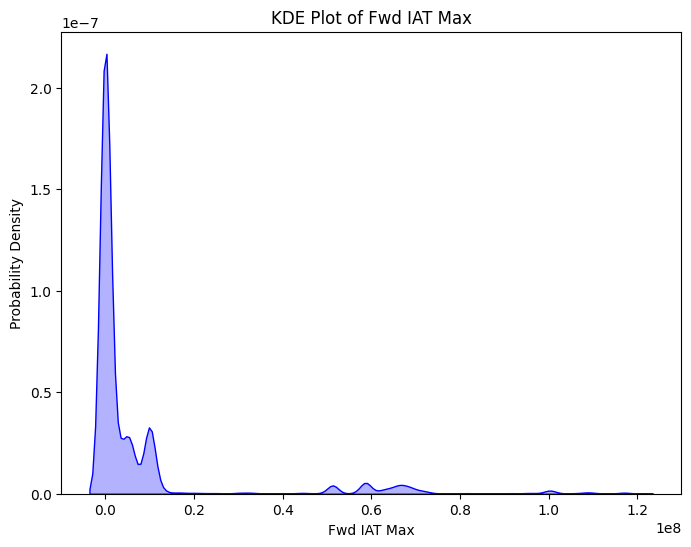

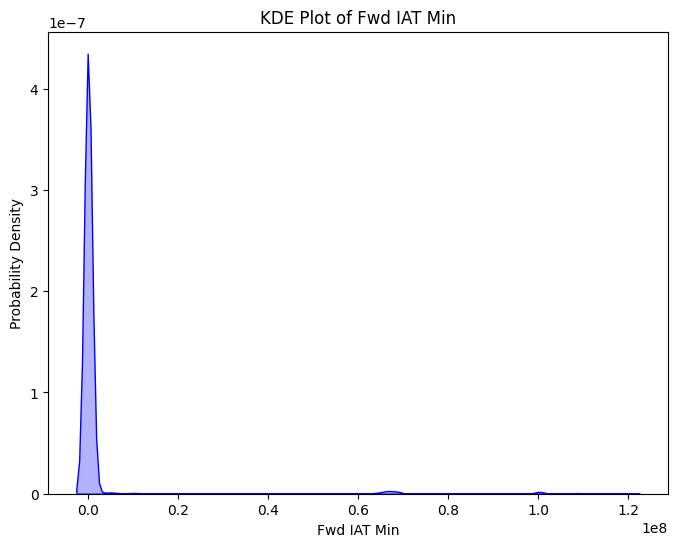

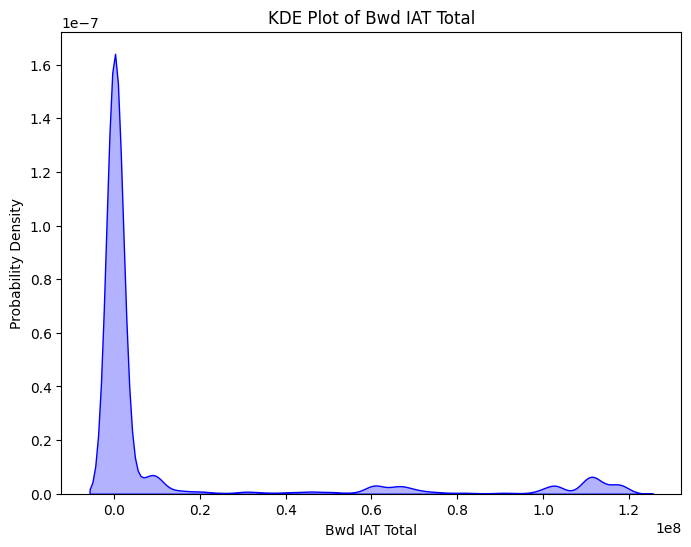

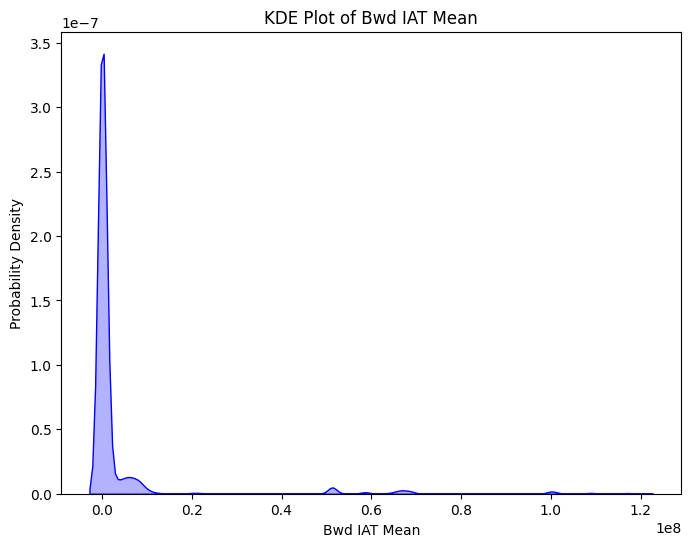

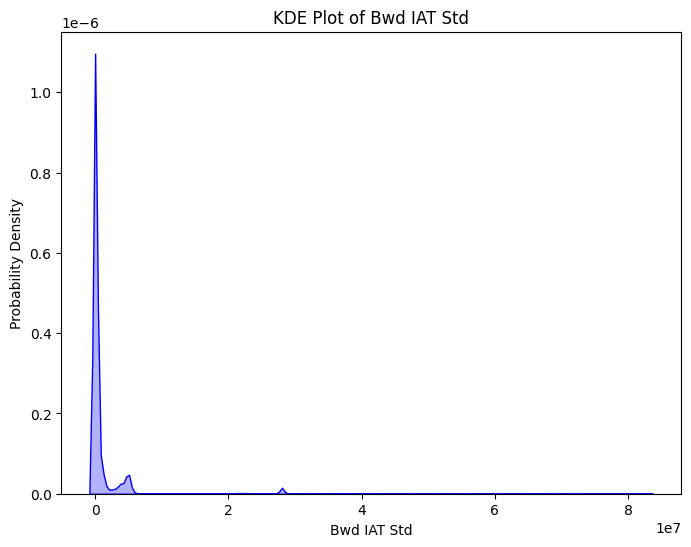

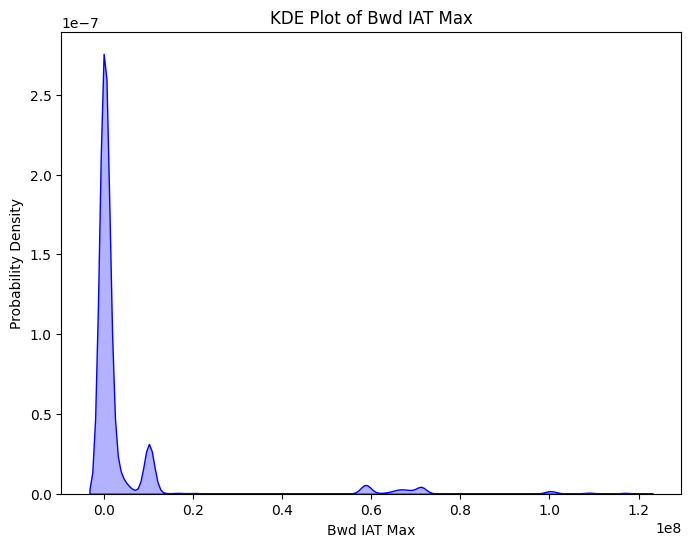

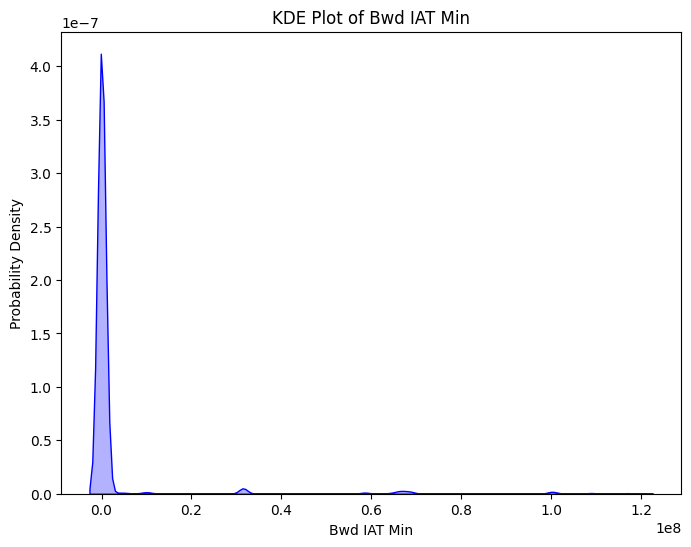

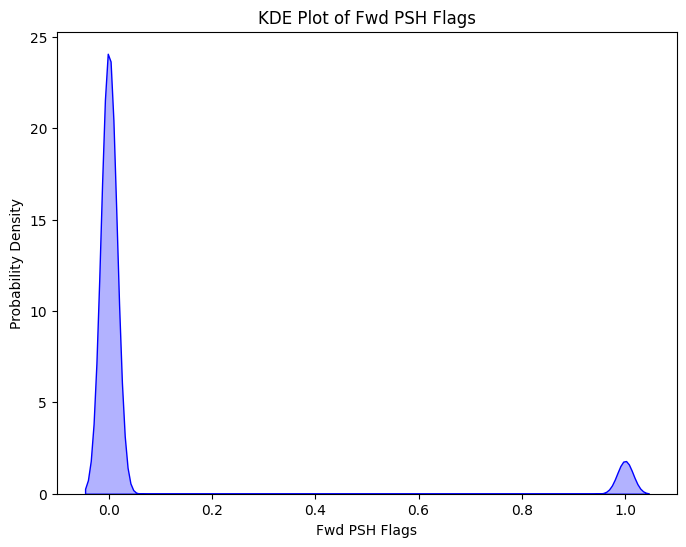

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


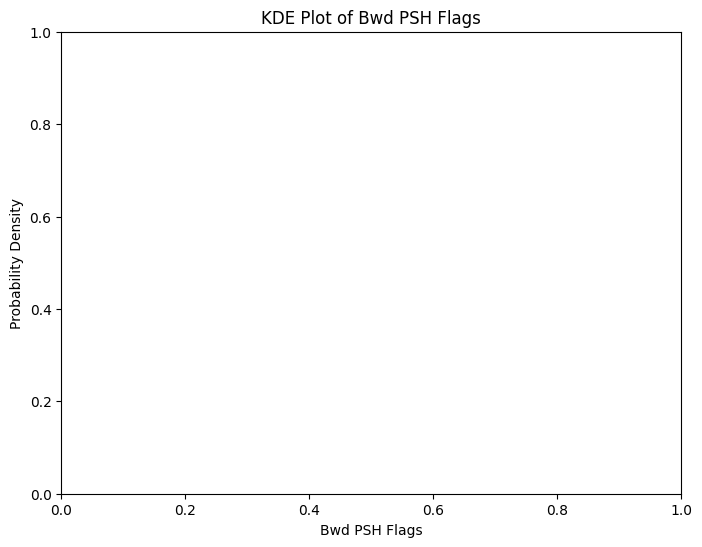

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


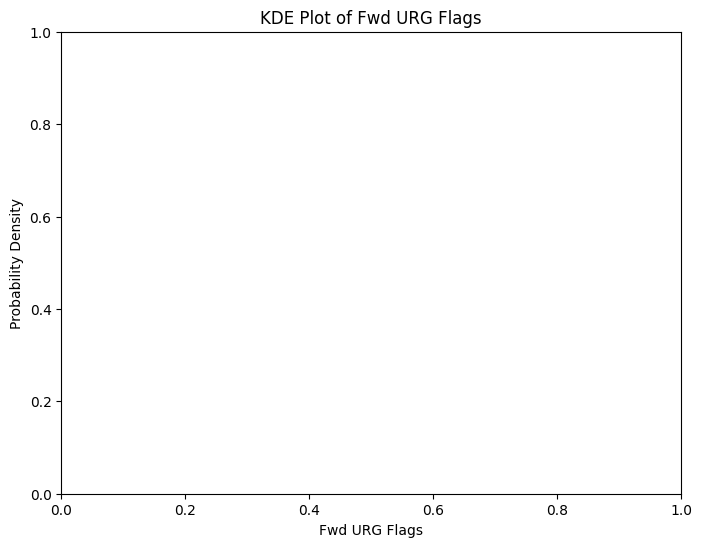

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


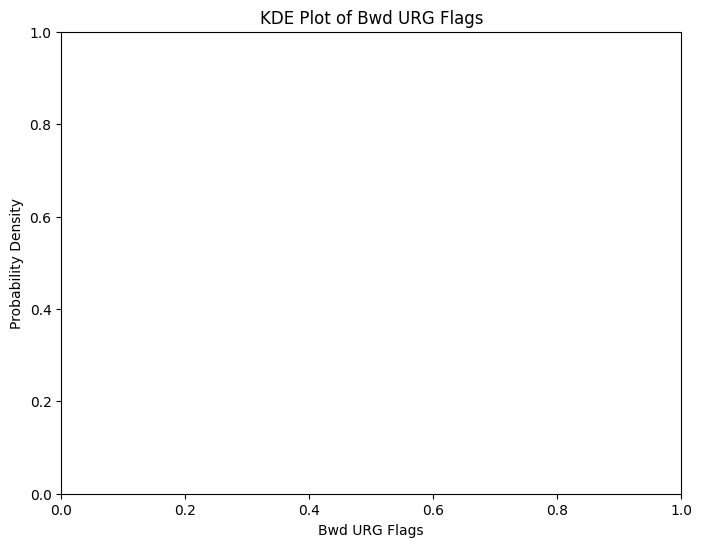

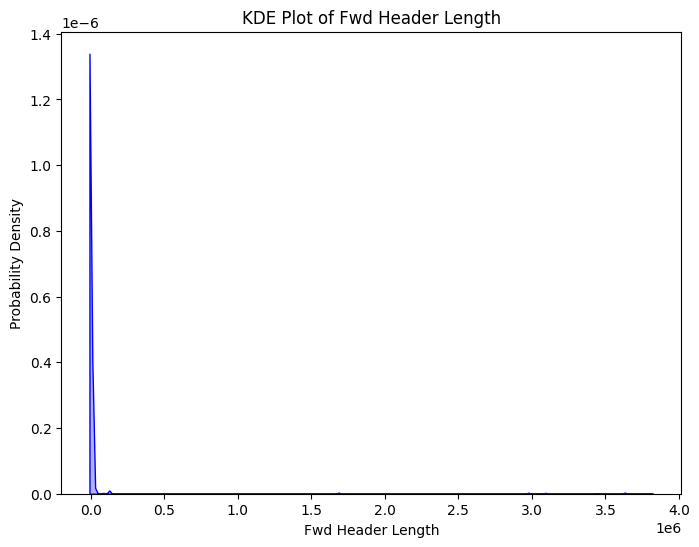

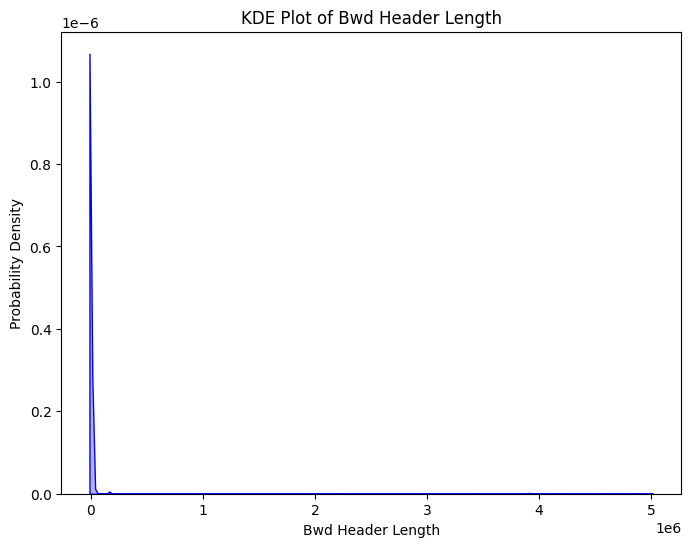

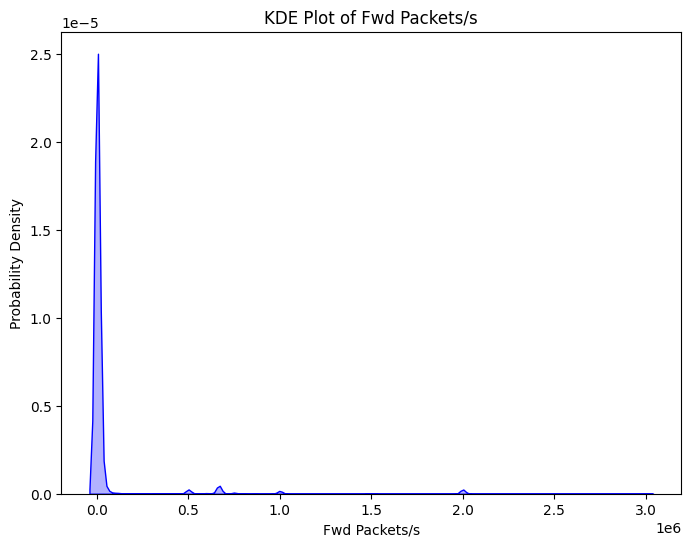

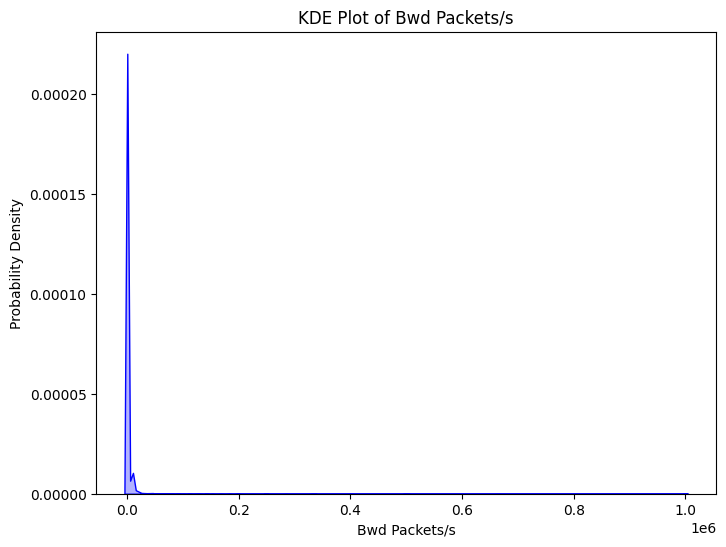

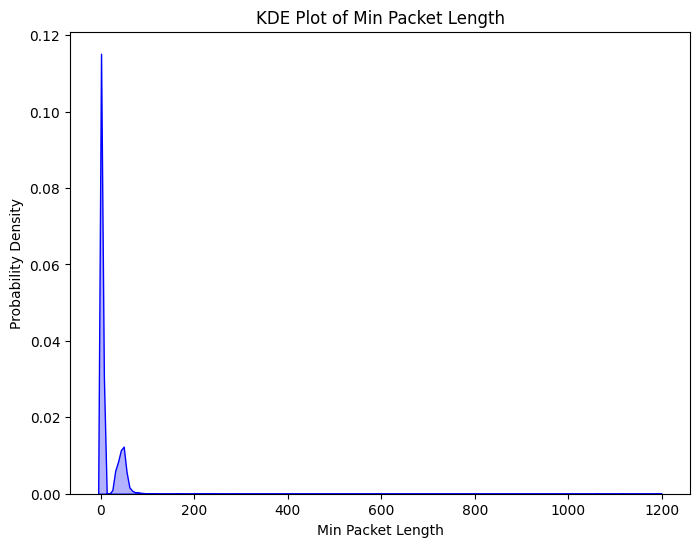

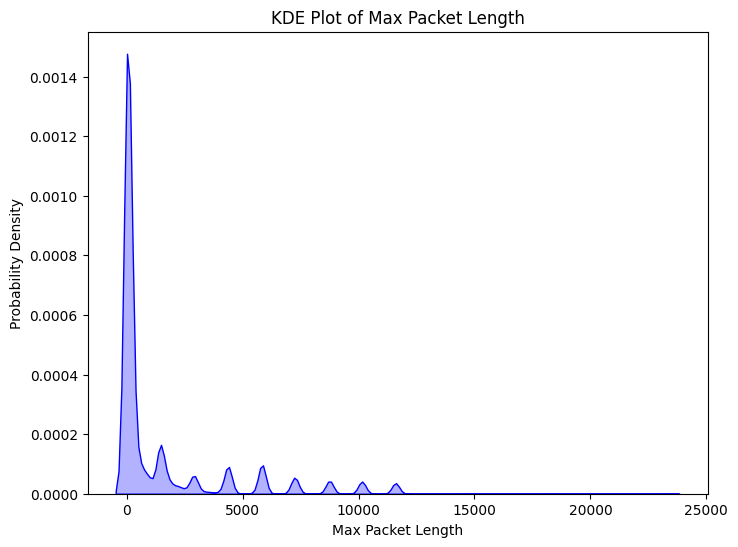

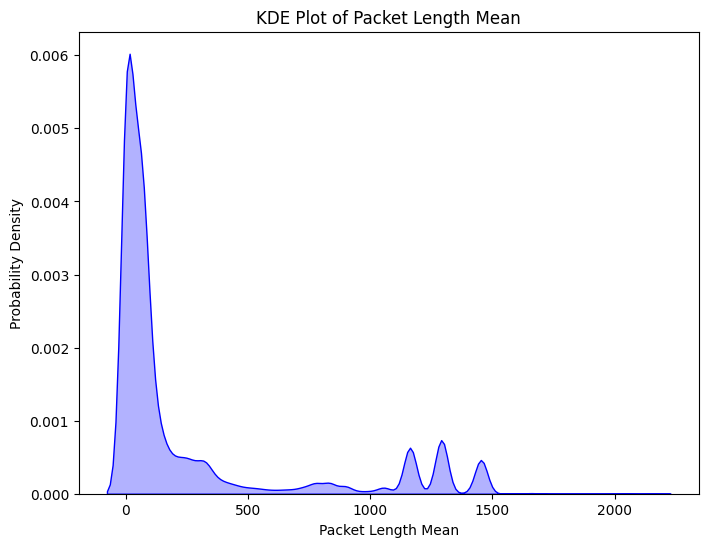

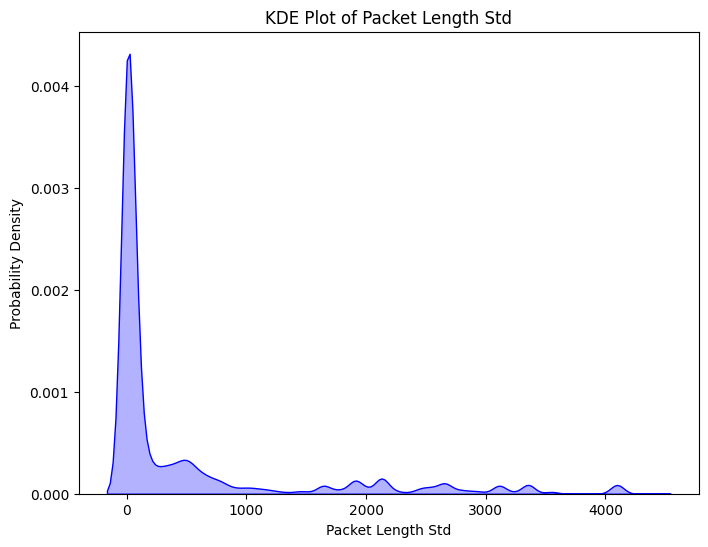

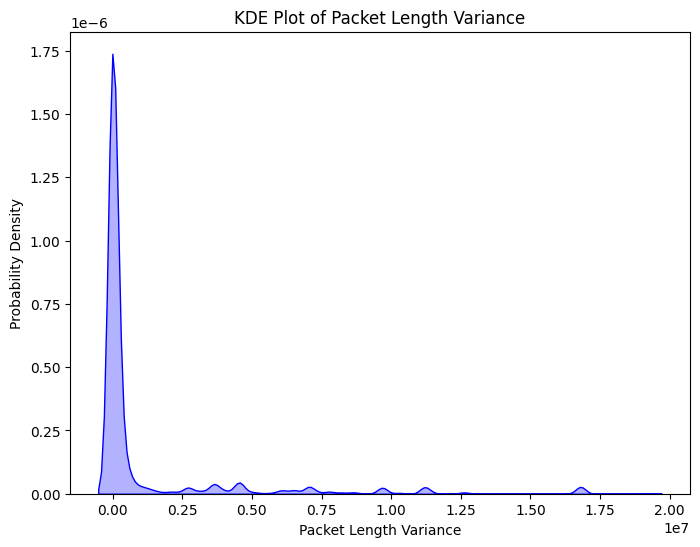

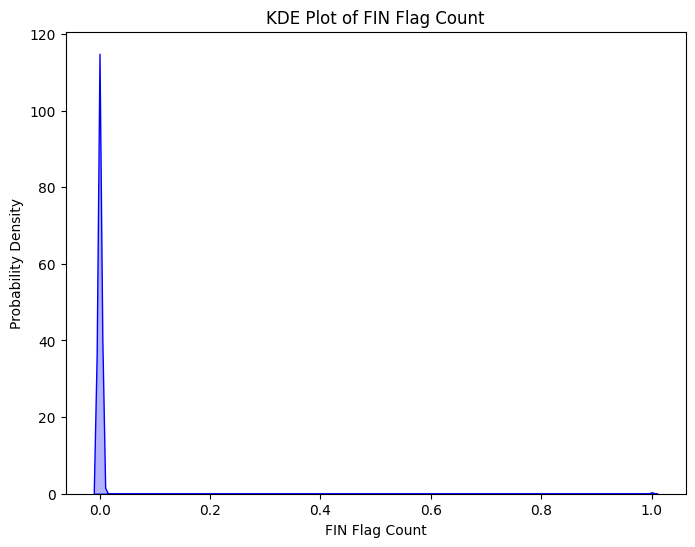

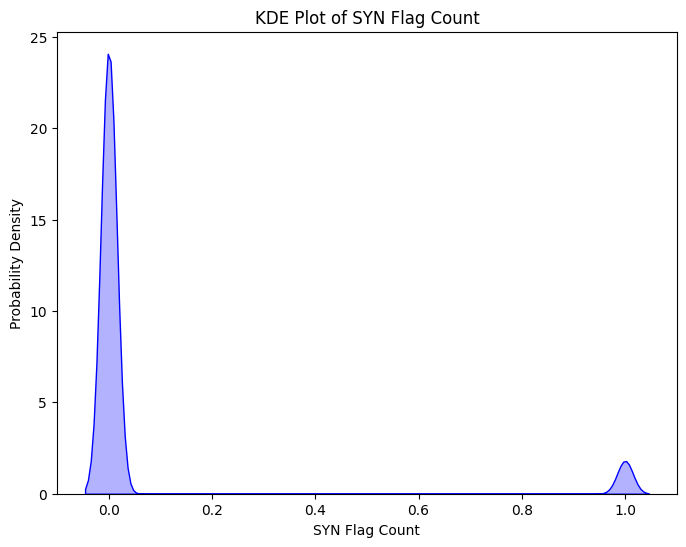

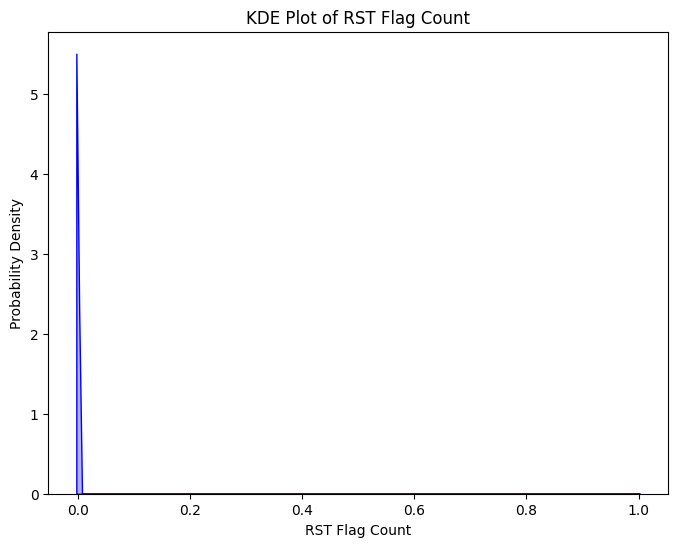

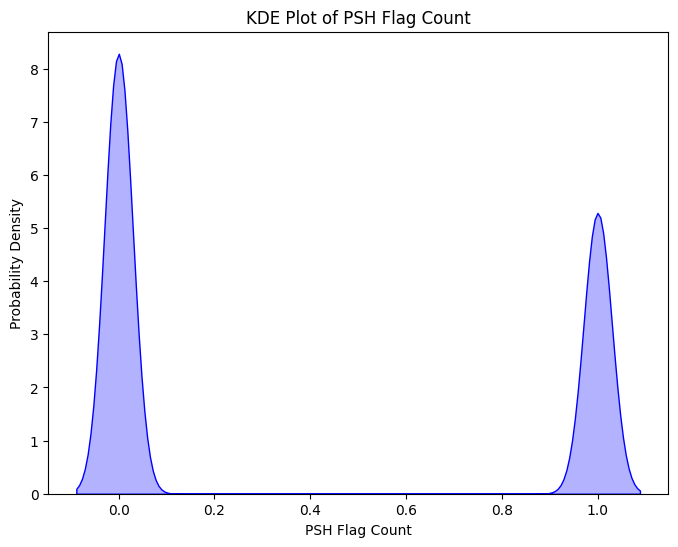

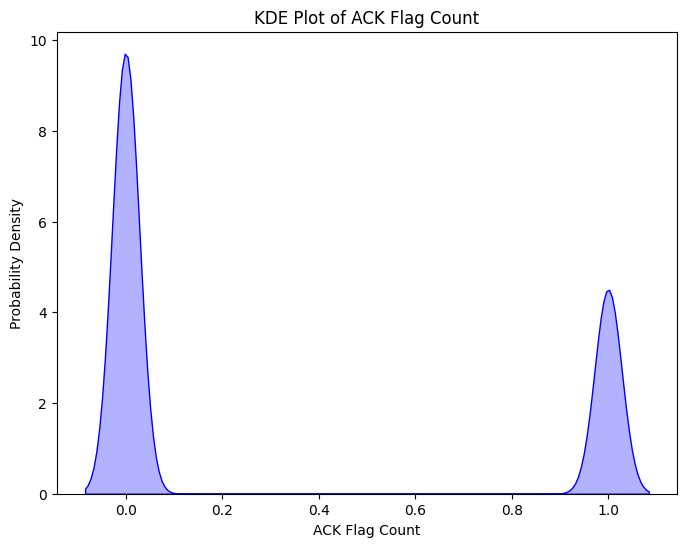

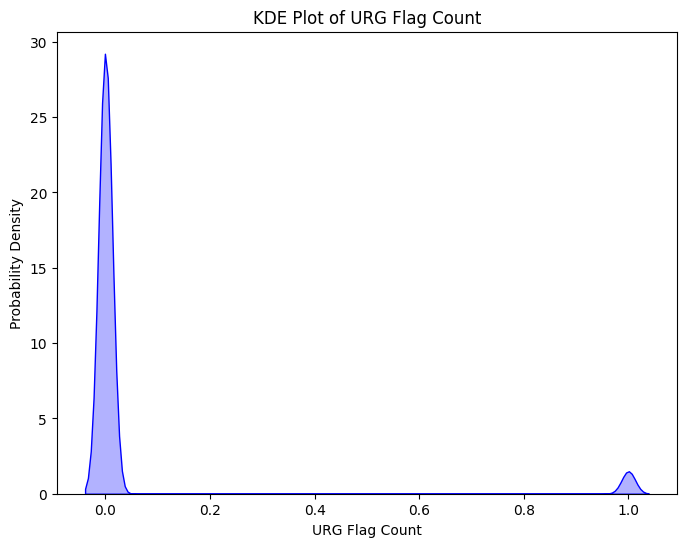

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


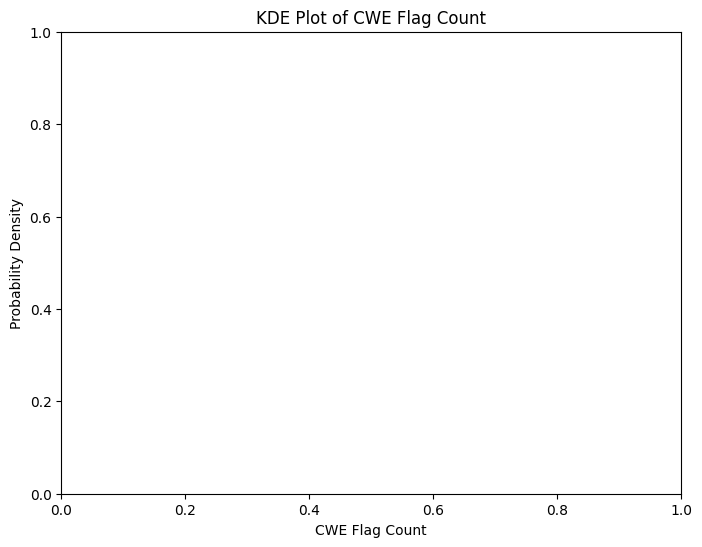

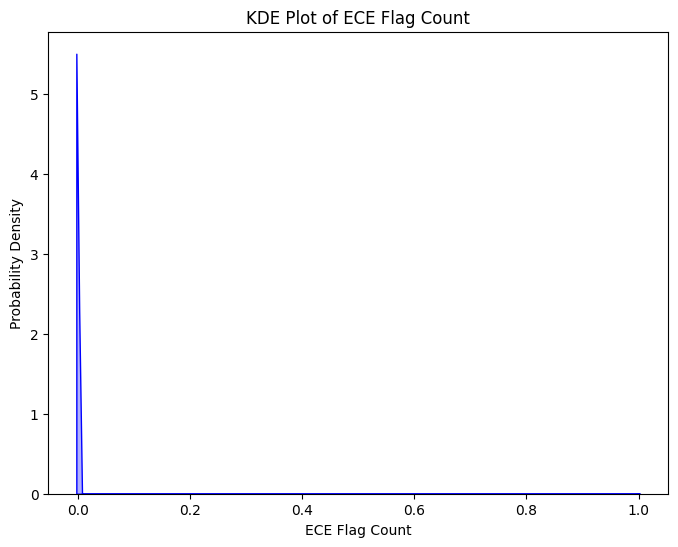

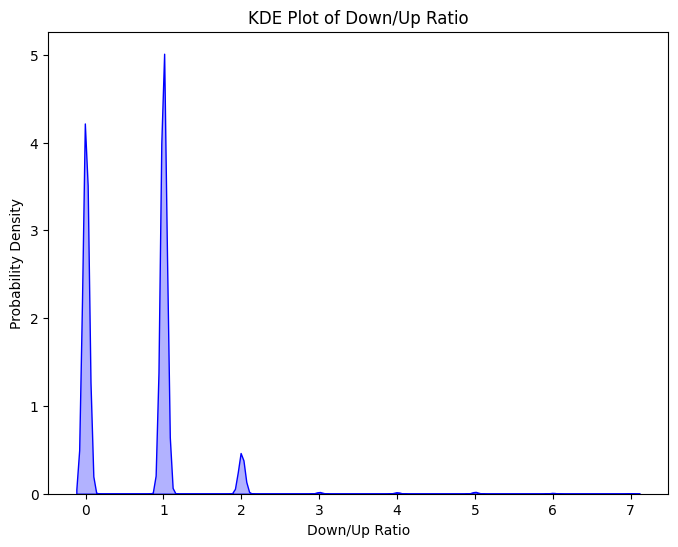

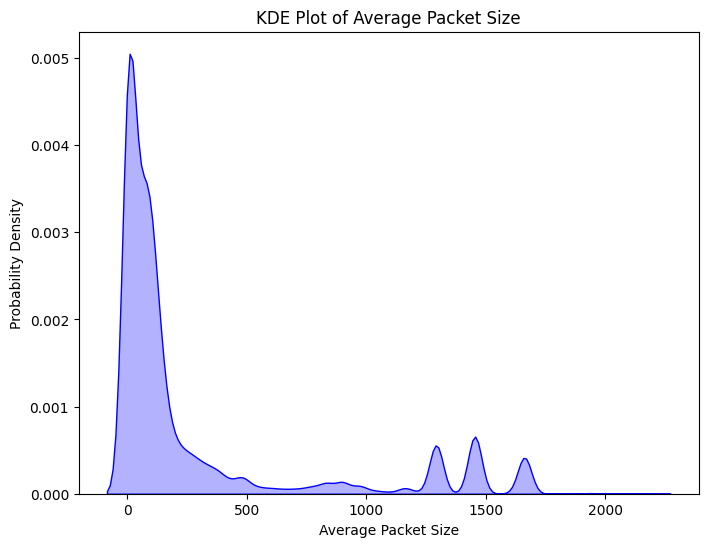

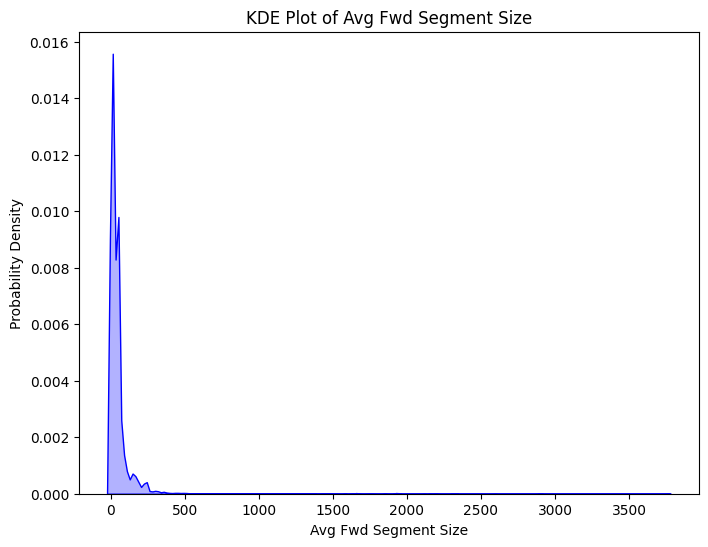

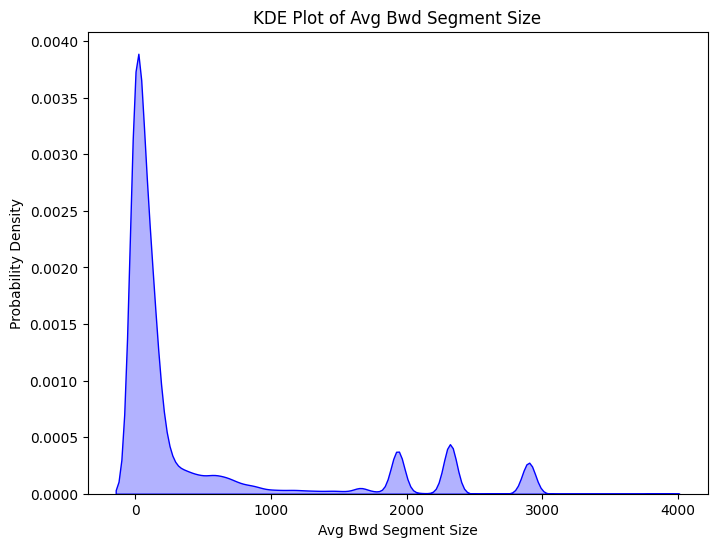

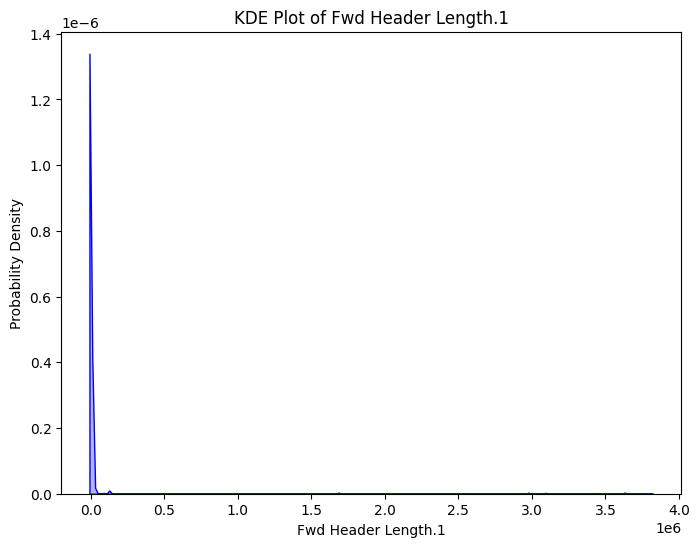

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


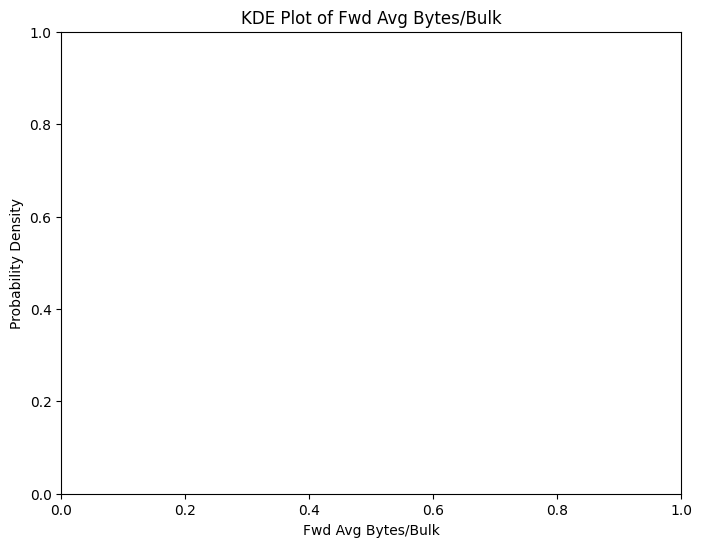

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


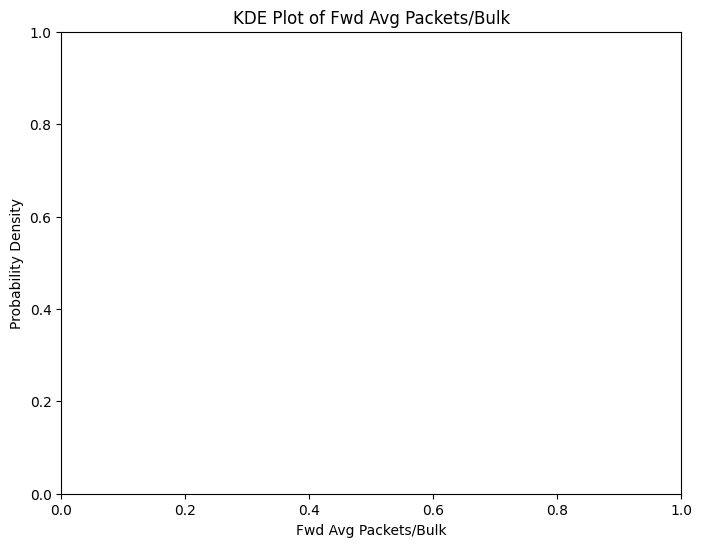

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


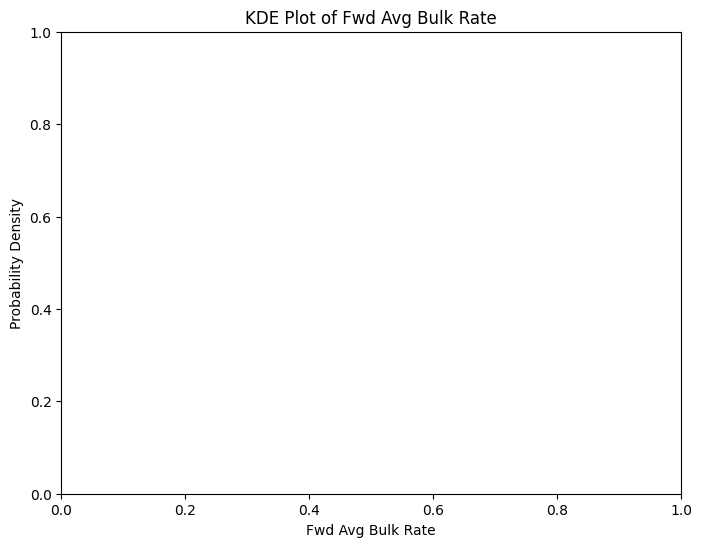

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


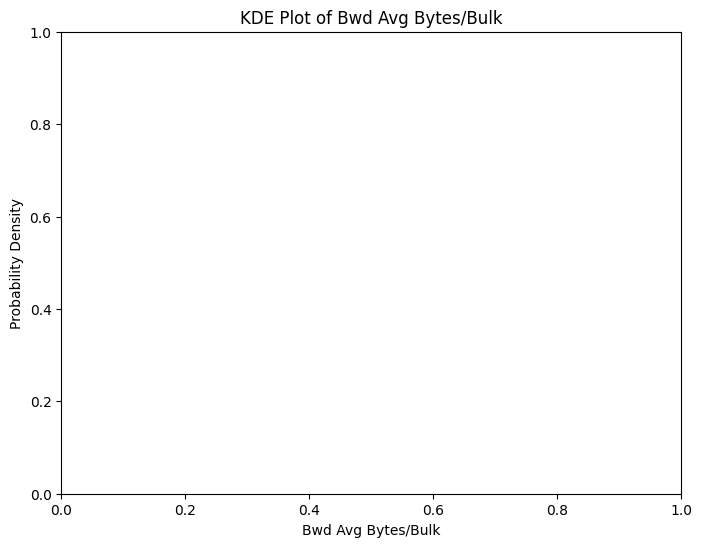

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


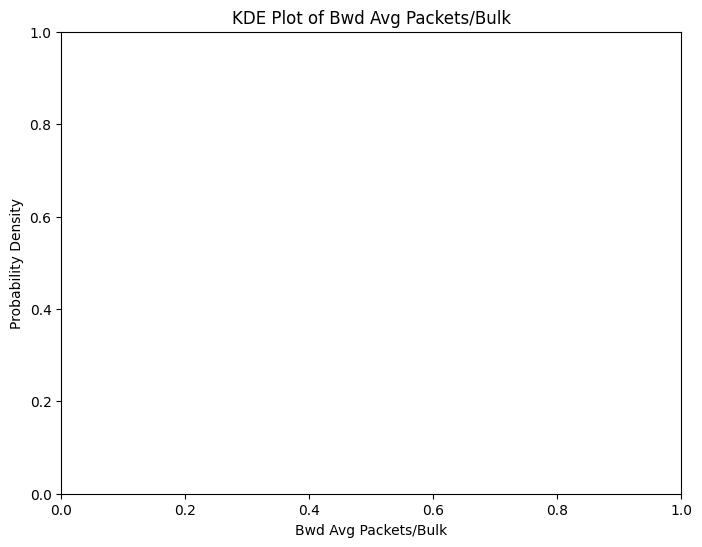

/tmp/ipython-input-25-3109719400.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df, x=column,


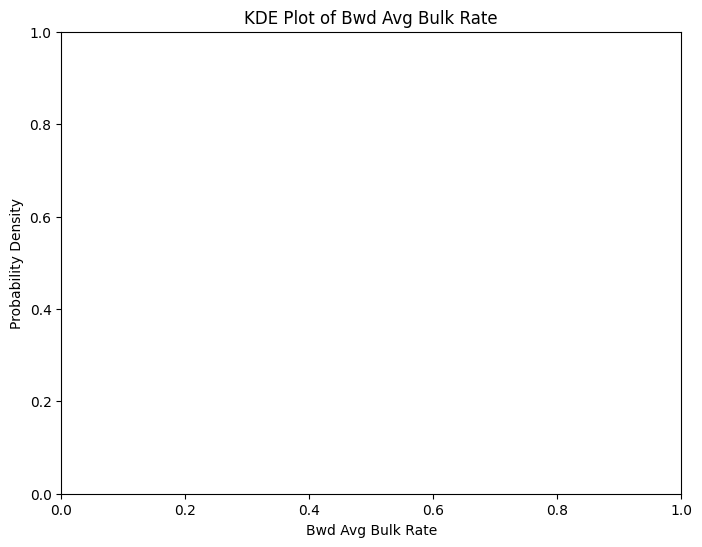

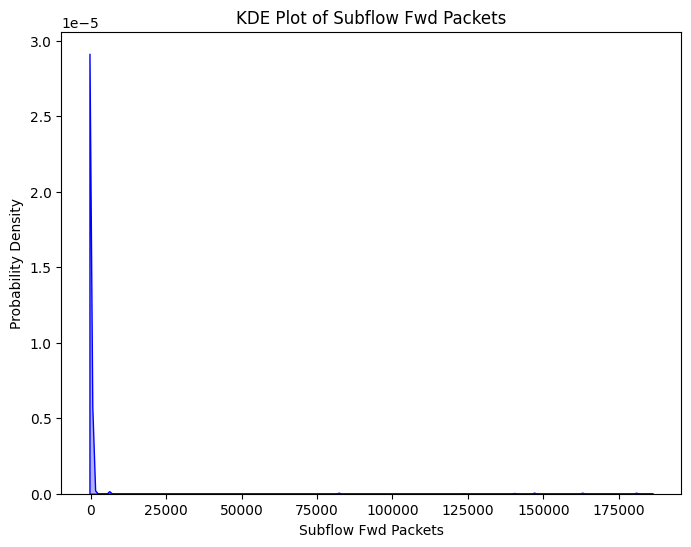

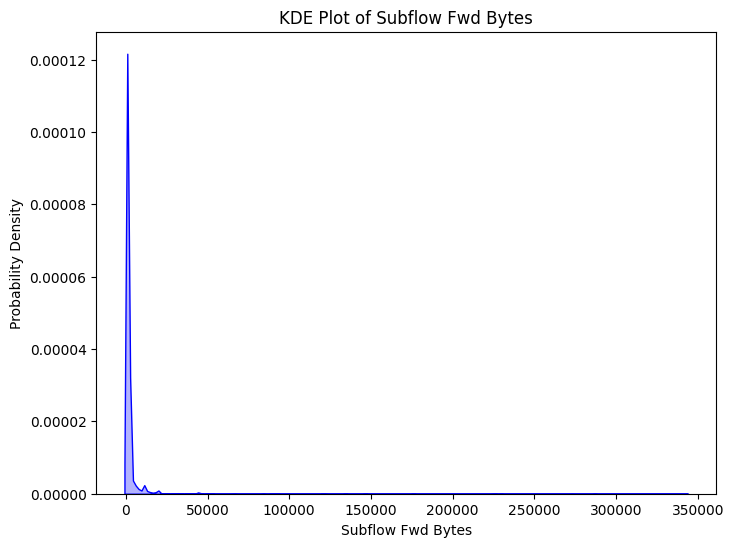

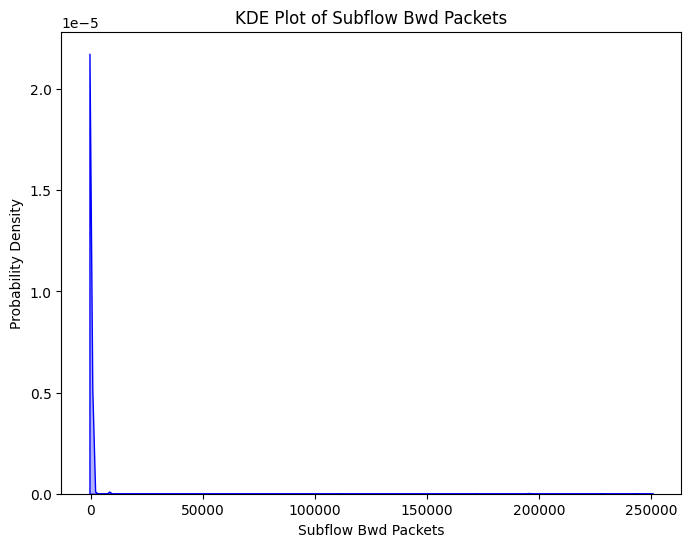

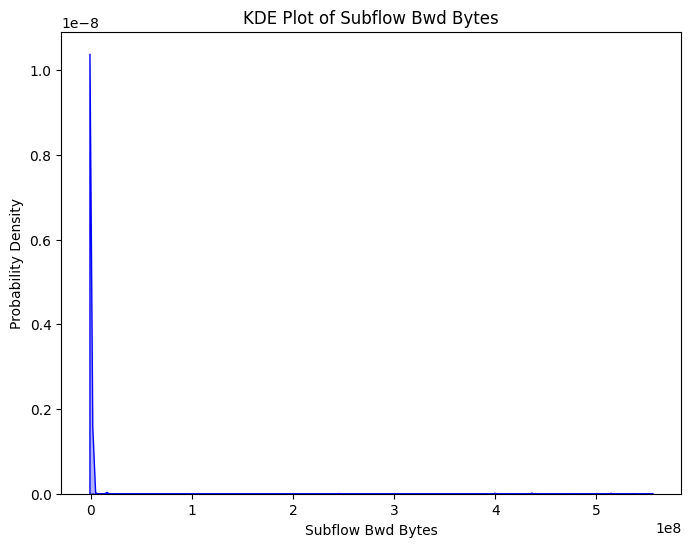

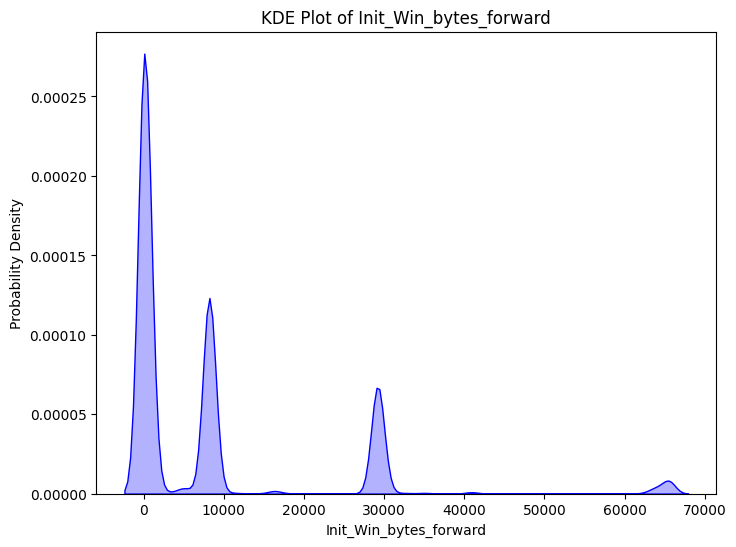

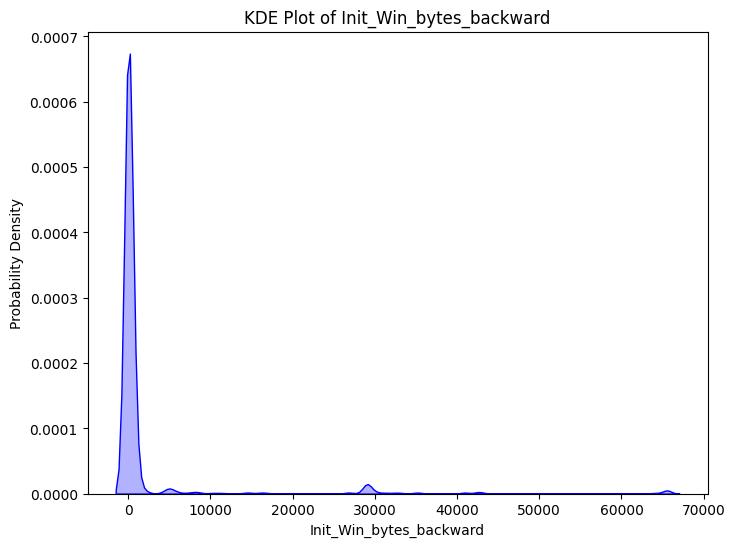

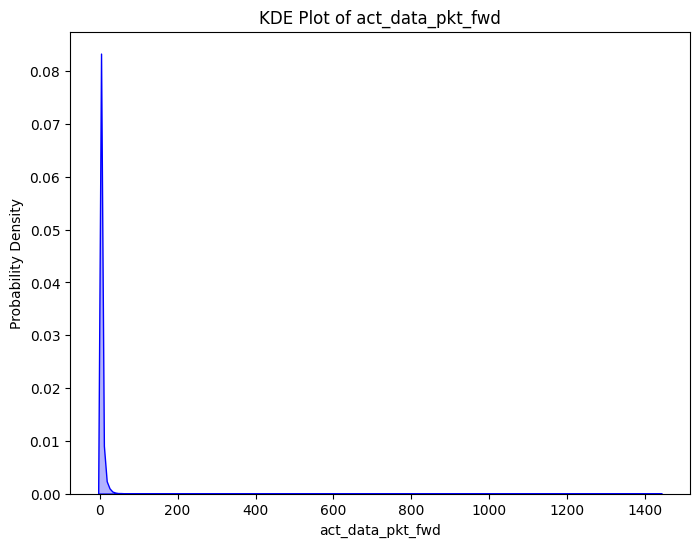

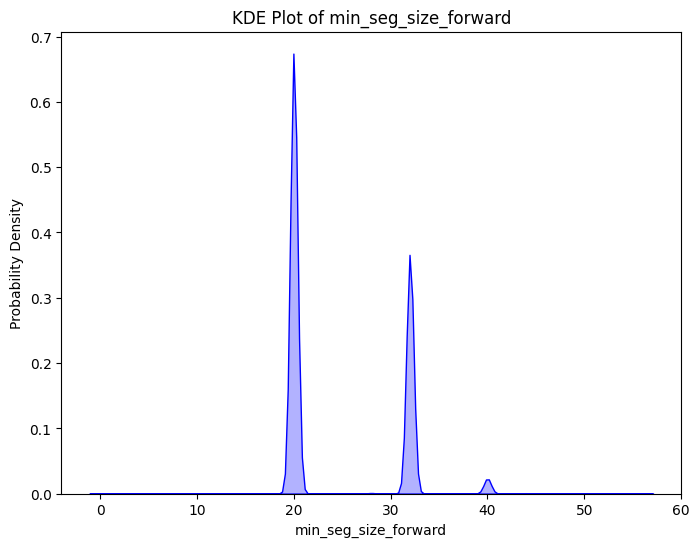

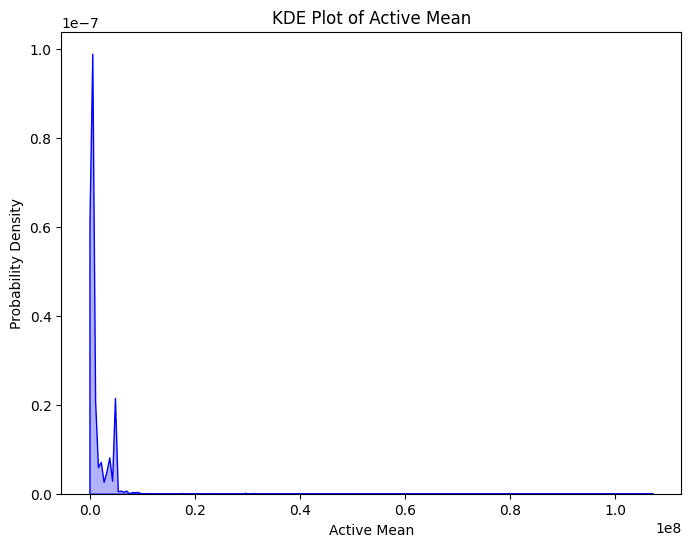

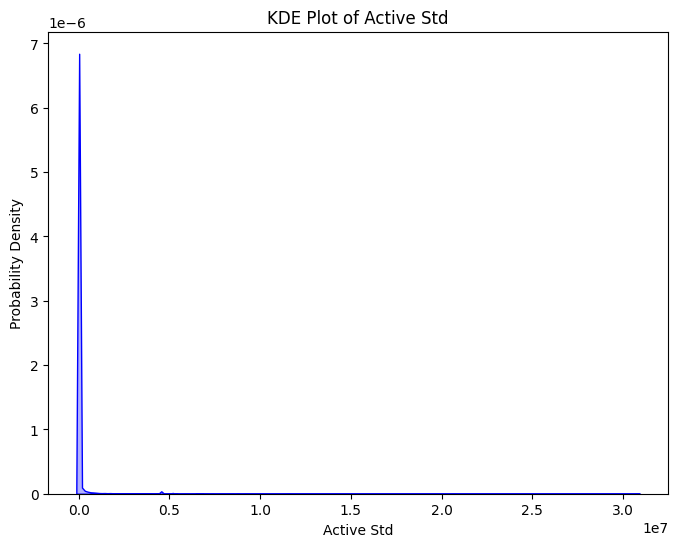

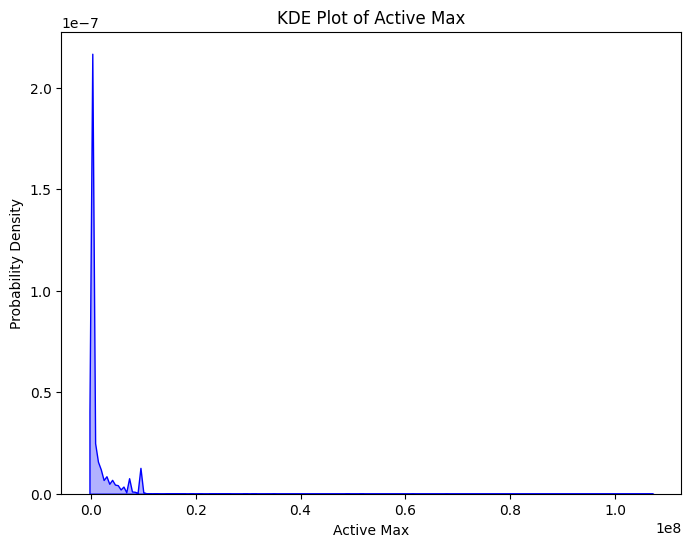

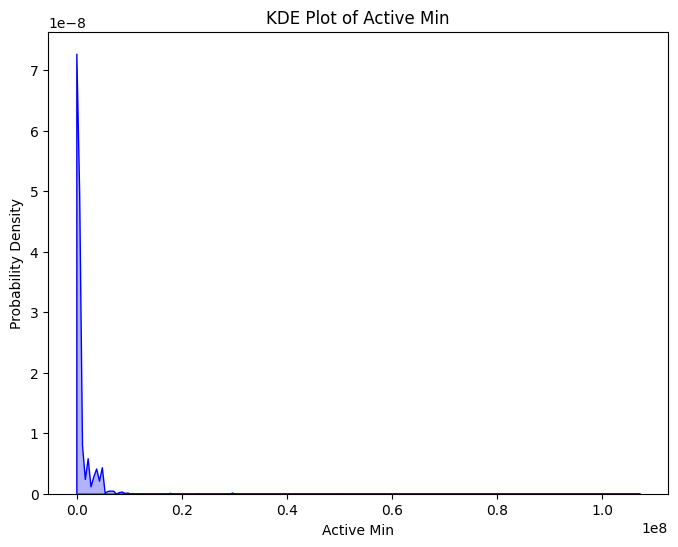

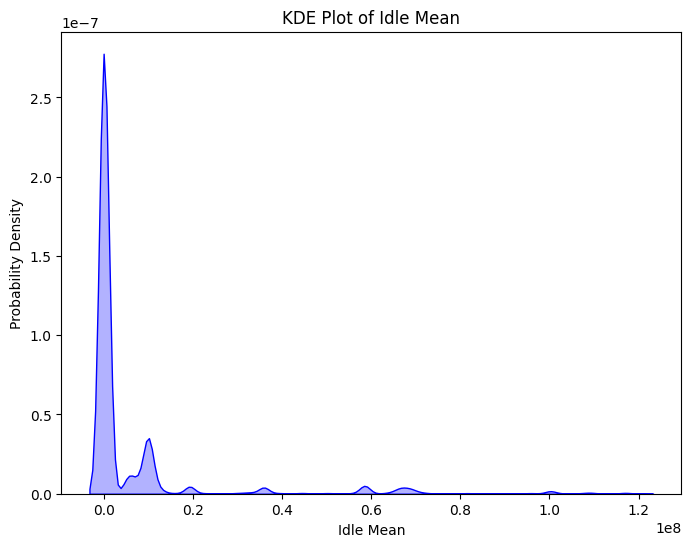

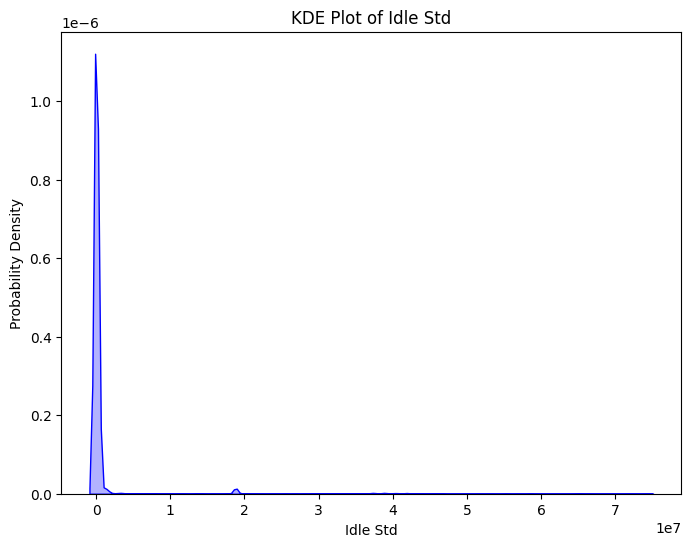

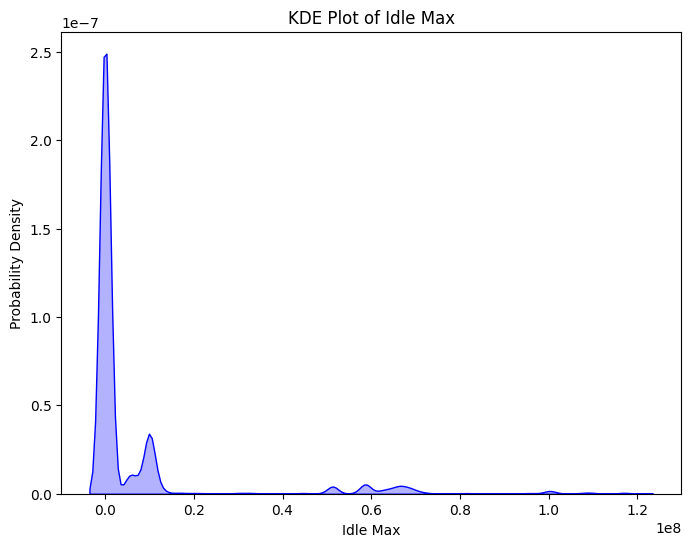

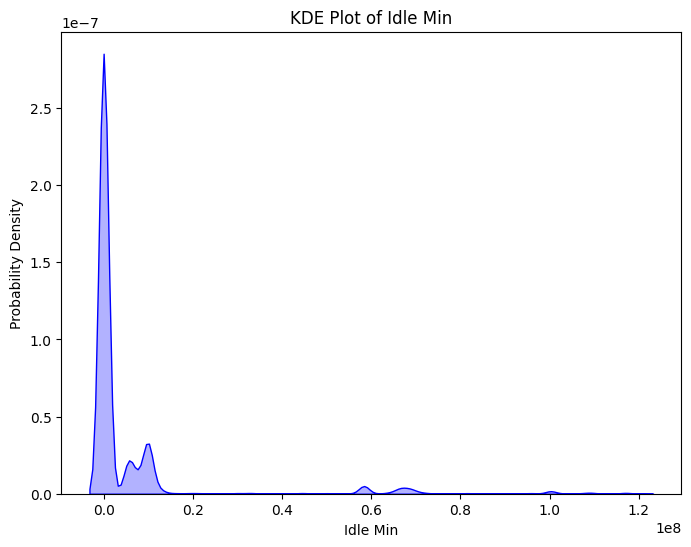

In [25]:
#KDE line for a continuous curves representing the estimated distribution of the data
def plot_kde_all_features(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 6))
        # Plot KDE for the selected column
        sns.kdeplot(data=combined_df, x=column,
                    color='b', fill=True, alpha=0.3, bw_adjust=0.5)
        plt.xlabel(column)
        plt.ylabel('Probability Density')
        plt.title(f'KDE Plot of {column}') # Updated title
        plt.show()

# Select numerical features
# Ensure only numeric columns are selected for KDE plotting
numerical_features = combined_df.select_dtypes(include=np.number).columns

# Plot KDEs for all numerical features
plot_kde_all_features(combined_df, numerical_features)

Correlation with Label_Encoded:
Label_Encoded             1.000000
PSH Flag Count            0.248965
Packet Length Variance    0.244704
Bwd Packet Length Std     0.239935
Packet Length Std         0.231928
                            ...   
Fwd Avg Packets/Bulk           NaN
Fwd Avg Bulk Rate              NaN
Bwd Avg Bytes/Bulk             NaN
Bwd Avg Packets/Bulk           NaN
Bwd Avg Bulk Rate              NaN
Name: Label_Encoded, Length: 79, dtype: float64


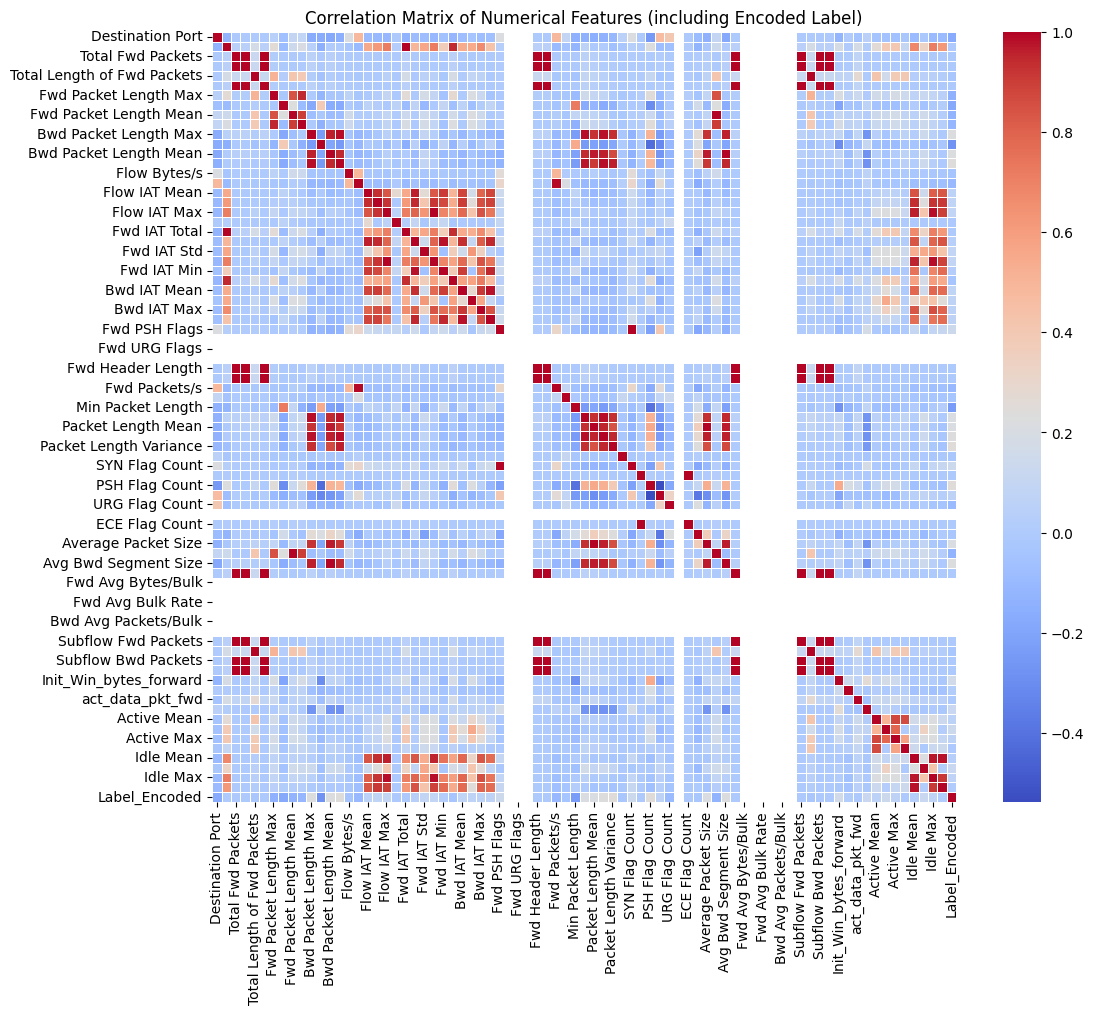

In [26]:
# Create a copy to avoid "SettingWithCopyWarning"
df_subset_for_corr = combined_df.copy()

# Handle categorical labels by encoding them
le = LabelEncoder()
df_subset_for_corr['Label_Encoded'] = le.fit_transform(df_subset_for_corr['Label'])

# Select only numerical columns (including the new encoded Label)
numerical_df = df_subset_for_corr.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Print the correlation of all numerical features with the encoded Label
print("Correlation with Label_Encoded:")
print(correlation_matrix['Label_Encoded'].sort_values(ascending=False))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10)) # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5) # Removed annot=True for cleaner look with many features
plt.title('Correlation Matrix of Numerical Features (including Encoded Label)')
plt.show()

# **The Correlation Matrix does not clearly specify which columns should be chosen as features and which should be used as the target column "Label." I plan to address this issue in the final delivery. Alternatively, drawing on my experience as a Security Engineer, I have selected the "Fwd Header Length" and "Bwd Header Length" columns, as these are more likely to be manipulated by hackers attempting to conceal their activities.**

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataframes
df_Tuesday = pd.read_csv('/content/drive/MyDrive/DataSet/Tuesday-WorkingHours.pcap_ISCX.csv')
df_Wednesday = pd.read_csv('/content/drive/MyDrive/DataSet/Wednesday-workingHours.pcap_ISCX.csv')
df_Thursday_Morning = pd.read_csv('/content/drive/MyDrive/DataSet/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df_Friday_Afternoon = pd.read_csv('/content/drive/MyDrive/DataSet/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')


# Select subsets and save (as done in previous cells)
df_subset_tuesday = df_Tuesday.loc[15000:25000].copy()
df_subset_wednesday = df_Wednesday.loc[39000:49000].copy()
df_subset_thursday = df_Thursday_Morning.loc[19000:29000].copy()
df_subset_friday_Afternoon = df_Friday_Afternoon.loc[18500:28500].copy()


# Combine the dataframes
combined_df = pd.concat([df_subset_tuesday, df_subset_wednesday, df_subset_thursday, df_subset_friday_Afternoon], ignore_index=True)

# Clean the combined dataframe (as done in previous cells)
combined_df.drop_duplicates(inplace=True)
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_df.dropna(inplace=True)
combined_df.columns = combined_df.columns.str.strip()


# Select the features (X) and the target (y)
X = combined_df[['Fwd Header Length', 'Bwd Header Length']]
y = combined_df['Label']

# Handle categorical labels if needed
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix:
[[8432    0   20    0    0]
 [2517    0    0    0    0]
 [ 243    0   88    0    0]
 [ 382    0    0    0    0]
 [ 108    0    0    0    0]]

Classification Report:
                          precision    recall  f1-score   support

                  BENIGN       0.72      1.00      0.84      8452
                    DDoS       0.00      0.00      0.00      2517
           DoS slowloris       0.81      0.27      0.40       331
             FTP-Patator       0.00      0.00      0.00       382
Web Attack � Brute Force       0.00      0.00      0.00       108

                accuracy                           0.72     11790
               macro avg       0.31      0.25      0.25     11790
            weighted avg       0.54      0.72      0.61     11790



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

## **The project modifications begin here in preparation for the final delivery.**

The confusion matrix reveals that the model is only accurately classifying the "BENIGN" and "DoS slowloris" labels, while it struggles to correctly identify the other attack types. Additionally, the warnings in the classification report indicate that the model is not converging and that some labels are not being predicted correctly. To address these issues, I added a cell to scale the data using StandardScaler, which should help the model converge and enhance its performance. I also increased the max_iter parameter to allow the model more iterations to achieve convergence.

## As shown above, the "UndefinedMetricWarning" is caused by the model's inability to predict certain classes. This is a common issue with imbalanced datasets. To resolve  this, I replaced the LogisticRegression model with a RandomForestClassifier. This model is often more effective in handling imbalanced data.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix:
[[8283  155    0   14    0]
 [   8 2500    9    0    0]
 [ 101    0  230    0    0]
 [   8    0    0  374    0]
 [ 103    0    0    0    5]]

Classification Report:
                          precision    recall  f1-score   support

                  BENIGN       0.97      0.98      0.98      8452
                    DDoS       0.94      0.99      0.97      2517
           DoS slowloris       0.96      0.69      0.81       331
             FTP-Patator       0.96      0.98      0.97       382
Web Attack � Brute Force       1.00      0.05      0.09       108

                accuracy                           0.97     11790
               macro avg       0.97      0.74      0.76     11790
            weighted avg       0.97      0.97      0.96     11790



# The RandomForestClassifier has significantly improved the model's performance and resolved the UndefinedMetricWarning.
# Per tables above, the analysis is as follows:
Higher Accuracy: The overall accuracy has increased to 97%, representing a significant improvement.

Improved Precision and Recall: Precision and recall scores for most classes have also improved considerably.

Ongoing Issue with "Web Attack – Brute Force": The model continues to struggle with identifying this particular attack type, as indicated by a very low recall of 5%. This suggests that, although the model rarely misclassifies other attacks as "Web Attack – Brute Force," it is still missing the majority of actual instances of this attack.

To enhance the model’s features, I added three additional columns—PSH Flag Count (correlation: 0.25), Packet Length Variance (correlation: 0.24), and Bwd Packet Length Std (correlation: 0.24)—as indicated in the correlation table above.

In [30]:
# Expand the feature set by including "PSH Flag Count," "Packet Length Variance," and
# "Bwd Packet Length Std" in addition to "Fwd Header Length" and "Bwd Header Length,"
# making a total of five features.
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Select the new features (X) and the target (y)
features = ['Fwd Header Length', 'Bwd Header Length', 'PSH Flag Count', 'Packet Length Variance', 'Bwd Packet Length Std']
X_new = combined_df[features]
y = combined_df['Label']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (5 features):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (5 features):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix (5 features):
[[8401    7    0    1   43]
 [   3 2514    0    0    0]
 [   1    0  330    0    0]
 [   2    0    0  380    0]
 [  13    0    0    0   95]]

Classification Report (5 features):
                          precision    recall  f1-score   support

                  BENIGN       1.00      0.99      1.00      8452
                    DDoS       1.00      1.00      1.00      2517
           DoS slowloris       1.00      1.00      1.00       331
             FTP-Patator       1.00      0.99      1.00       382
Web Attack � Brute Force       0.69      0.88      0.77       108

                accuracy                           0.99     11790
               macro avg       0.94      0.97      0.95     11790
            weighted avg       0.99      0.99      0.99     11790



After incorporating the three additional features, the model’s overall performance improved significantly. The updated model achieved higher accuracy, and the macro averages for precision, recall, and F1-score all increased substantially. This indicates that the model is now much more effective at accurately classifying all types of attacks.

* "Web Attack � Brute Force" Detection:  The most significantimprovement is in the detection of the "Web Attack � Brute Force" class. The recall for this class has jumped from a mere 5% to 88%! This means the model is now able to correctly identify most of the "Web Attack � Brute Force" instances.
*   Precision-Recall Balance:  The new model has a much better balance between precision and recall, as indicated by the higher f1-score.




In [31]:
# To have optimum model, conduct hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
print("\nConfusion Matrix (best model):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (best model):")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}

Confusion Matrix (best model):
[[8402    6    0    1   43]
 [   3 2514    0    0    0]
 [   1    0  330    0    0]
 [   2    0    0  380    0]
 [  13    0    0    0   95]]

Classification Report (best model):
                          precision    recall  f1-score   support

                  BENIGN       1.00      0.99      1.00      8452
                    DDoS       1.00      1.00      1.00      2517
           DoS slowloris       1.00      1.00      1.00       331
             FTP-Patator       1.00      0.99      1.00       382
Web Attack � Brute Force       0.69      0.88      0.77       108

                accuracy                           0.99     11790
               macro avg       0.94      0.97      0.95     11790
            weighted avg       0.99      0.99      0.99     11790



# The performance of the tuned model is almost identical to the model with the default parameters. It seems that the default hyperparameters of the Random Forest Classifier were already quite good for this dataset.

# Try to improve Imbalance classification.

In [32]:
!pip install imbalanced-learn

In [33]:
# To chack for the class imbalance of "Web Attack � Brute Force"
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the oversampler to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# Initialize and train the RandomForestClassifier model on the resampled data
model_resampled = RandomForestClassifier(random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = model_resampled.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (resampled):")
print(confusion_matrix(y_test, y_pred_resampled))
print("\nClassification Report (resampled):")
print(classification_report(y_test, y_pred_resampled, target_names=le.classes_))

Confusion Matrix (resampled):
[[8108    9    0    1  334]
 [   3 2514    0    0    0]
 [   1    0  330    0    0]
 [   2    0    0  380    0]
 [   0    0    0    0  108]]

Classification Report (resampled):
                          precision    recall  f1-score   support

                  BENIGN       1.00      0.96      0.98      8452
                    DDoS       1.00      1.00      1.00      2517
           DoS slowloris       1.00      1.00      1.00       331
             FTP-Patator       1.00      0.99      1.00       382
Web Attack � Brute Force       0.24      1.00      0.39       108

                accuracy                           0.97     11790
               macro avg       0.85      0.99      0.87     11790
            weighted avg       0.99      0.97      0.98     11790



*  "Web Attack � Brute Force" Recall: The recall for the "Web Attack � Brute Force" class is now 100%! This is a great improvement and means that the model is now able to correctly identify all instances of this attack.
*  Precision-Recall Trade-off: However, this improvement in recall has come at the cost of a decrease in precision for the "Web Attack � Brute Force" class (from 69% to 24%). This means that the model is now more likely to misclassify other attacks as "Web Attack � Brute Force".
*   Overall Performance: The overall accuracy of the model has decreased slightly, and the macro averages for precision and f1-score are also lower.
* ** CONCLUSION**: I want to minimize false positives, even if it means missing a few instances of "Web Attack � Brute Force". As such, I an happy with the previous model and its overall performance.



In [34]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Fit and apply the oversampler to the training data
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train the RandomForestClassifier model on the resampled data
model_resampled_smote = RandomForestClassifier(random_state=42)
model_resampled_smote.fit(X_train_resampled_smote, y_train_resampled_smote)

# Make predictions
y_pred_resampled_smote = model_resampled_smote.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_resampled_smote))
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_resampled_smote, target_names=le.classes_))

Confusion Matrix (SMOTE):
[[8111    6    0    1  334]
 [   3 2514    0    0    0]
 [   1    0  330    0    0]
 [   2    0    0  380    0]
 [   0    0    0    0  108]]

Classification Report (SMOTE):
                          precision    recall  f1-score   support

                  BENIGN       1.00      0.96      0.98      8452
                    DDoS       1.00      1.00      1.00      2517
           DoS slowloris       1.00      1.00      1.00       331
             FTP-Patator       1.00      0.99      1.00       382
Web Attack � Brute Force       0.24      1.00      0.39       108

                accuracy                           0.97     11790
               macro avg       0.85      0.99      0.87     11790
            weighted avg       0.99      0.97      0.98     11790



RandomOverSampler and SMOTE, have produced very similar results. Both significantly improve the recall for the "Web Attack � Brute Force" class to 100%, but at the cost of a lower precision (24%).

In [35]:
!pip install lightgbm

In [36]:
import lightgbm as lgb

# Initialize the LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 27508, number of used features: 5
[LightGBM] [Info] Start training from score -0.332844
[LightGBM] [Info] Start training from score -1.544111
[LightGBM] [Info] Start training from score -3.571953
[LightGBM] [Info] Start training from score -3.428766
[LightGBM] [Info] Start training from score -4.700771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix (LightGBM):
[[8400    6    1    1   44]
 [   3 2514    0    0    0]
 [   1    0  330    0    0]
 [   2    0    0  380    0]
 [  13    0    0    0   95]]

Classification Report (LightGBM):
                          precision    recall  f1-score   support

                  BENIGN       1.00      0.99      1.00      8452
                    DDoS       1.00      1.00      1.00      2517
           DoS slowloris       1.00      1.00      1.00       331
             FTP-Patator       1.00      0.99      1.00       382
Web Attack � Brute Force       0.68      0.88      0.77       108

                accuracy                           0.99     11790
               macro avg       0.93      0.97      0.95     11790
            weighted avg       0.99      0.99      0.99     11790



The LightGBM model performs very similar to Random Forest model. The comparison analysis indicates:

*   Accuracy: Both models achieve an impressive 99% accuracy.
*   Precision, Recall, and F1-score: The scores for both models are almost identical across all classes.

This tells me that for this dataset, both Random Forest and LightGBM are good choices. Since their performance is so similar, you can confidently choose either one.

